# EXPLORATORY DATA ANALYSIS - RETAIL STORE

**_IMPORTING LIBRARIES_**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from ipywidgets import interact
from plotnine import *
import warnings
warnings.filterwarnings('ignore')
plt.style.use("dark_background")

**_DATA EXPLORATION_**

In [2]:
df= pd.read_csv("SampleSuperstore.csv")

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df[['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']].nunique()

Ship Mode         4
Segment           3
Country           1
City            531
State            49
Region            4
Category          3
Sub-Category     17
dtype: int64

**_SALES V/S PROFIT_**

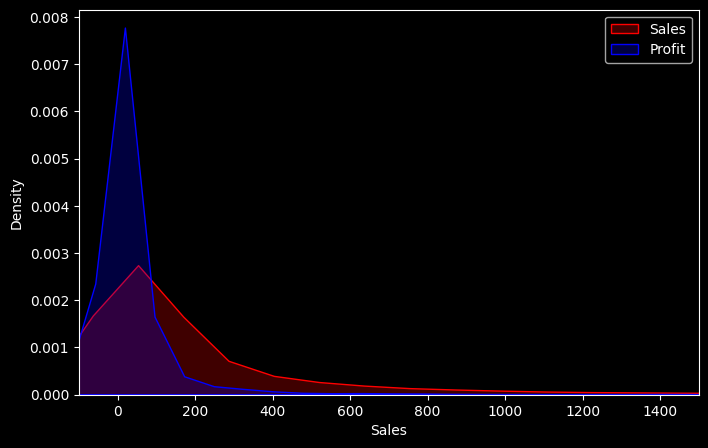

In [6]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['Sales'],color='red',label='Sales', shade=True)
sns.kdeplot(df['Profit'],color='blue',label='Profit', shade=True)
plt.xlim([-100,1500])
plt.legend()

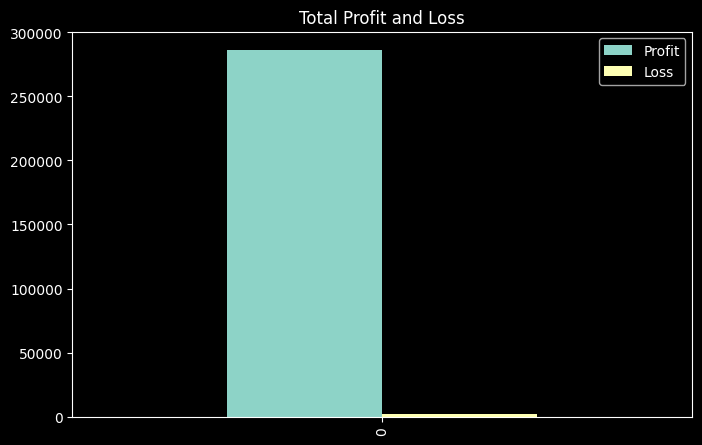

Profit:  286397.0217
Loss:  1871


In [7]:
profit = df['Profit'].sum()
loss = (df['Profit'] < 0).sum()
profit_loss = {'Profit' : [profit], 'Loss' : [loss]}
p_l = pd.DataFrame(profit_loss)
p_l.plot(kind='bar', figsize=(8,5))
plt.title('Total Profit and Loss')
plt.show()
print("Profit: ", profit)
print("Loss: ", loss)

**_SALES ANALYSIS_**

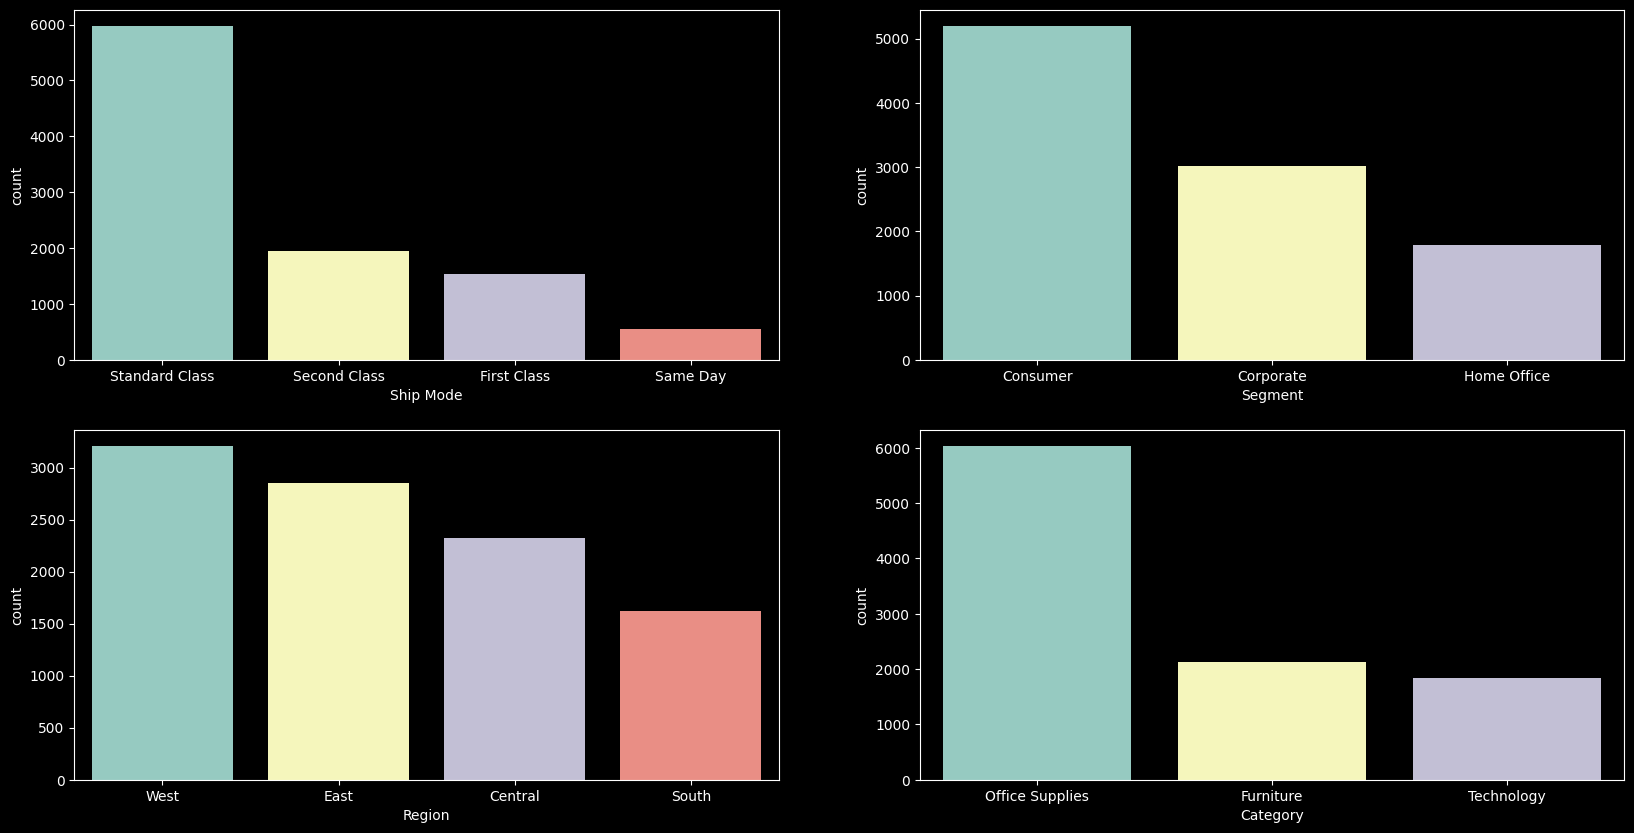

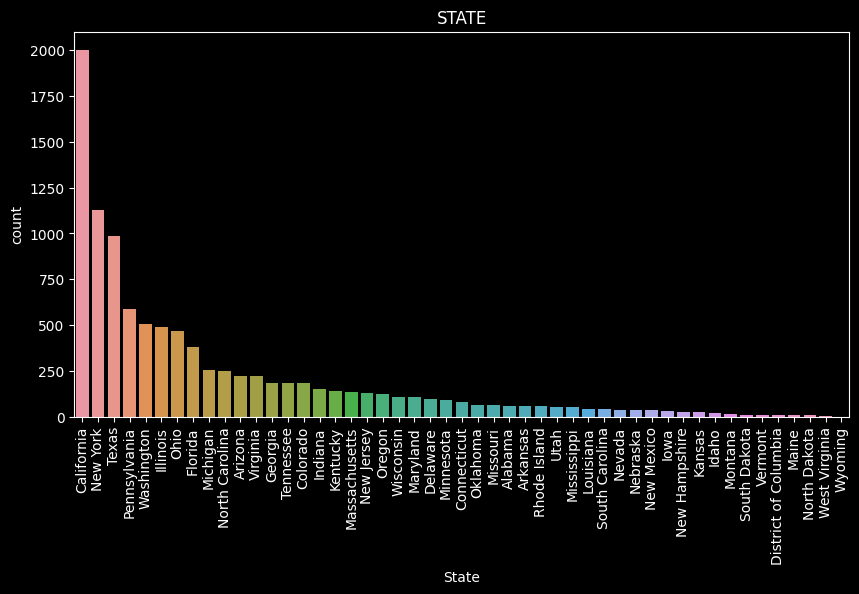

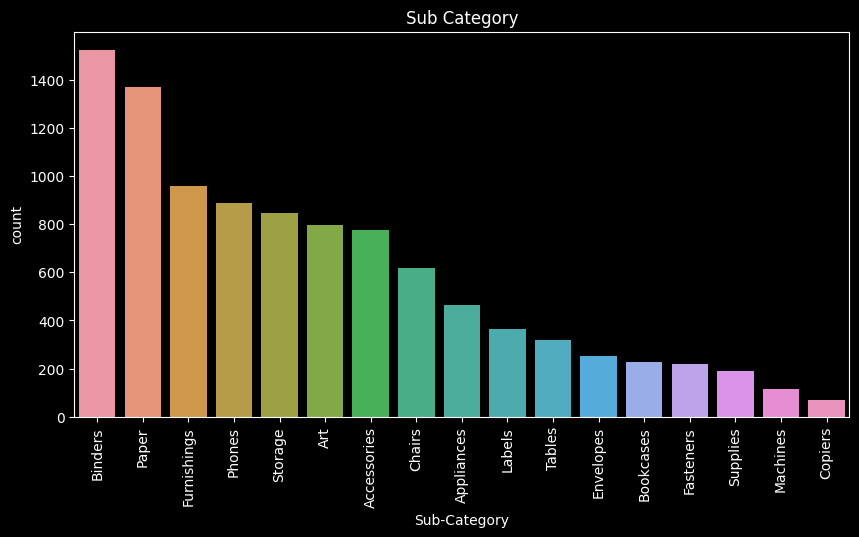

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(20,10)) 
sns.countplot(ax=axes[0, 0], x=df['Ship Mode'], order = df['Ship Mode'].value_counts().index)
sns.countplot(ax=axes[0, 1], x=df['Segment'], order = df['Segment'].value_counts().index)
sns.countplot(ax=axes[1, 0], x=df['Region'], order = df['Region'].value_counts().index)
sns.countplot(ax=axes[1, 1], x=df['Category'], order = df['Category'].value_counts().index)

plt.figure(figsize=(10,5))
sns.countplot(x=df['State'], order = df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.title("STATE")
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x=df['Sub-Category'], order = df['Sub-Category'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Sub Category")
plt.show()

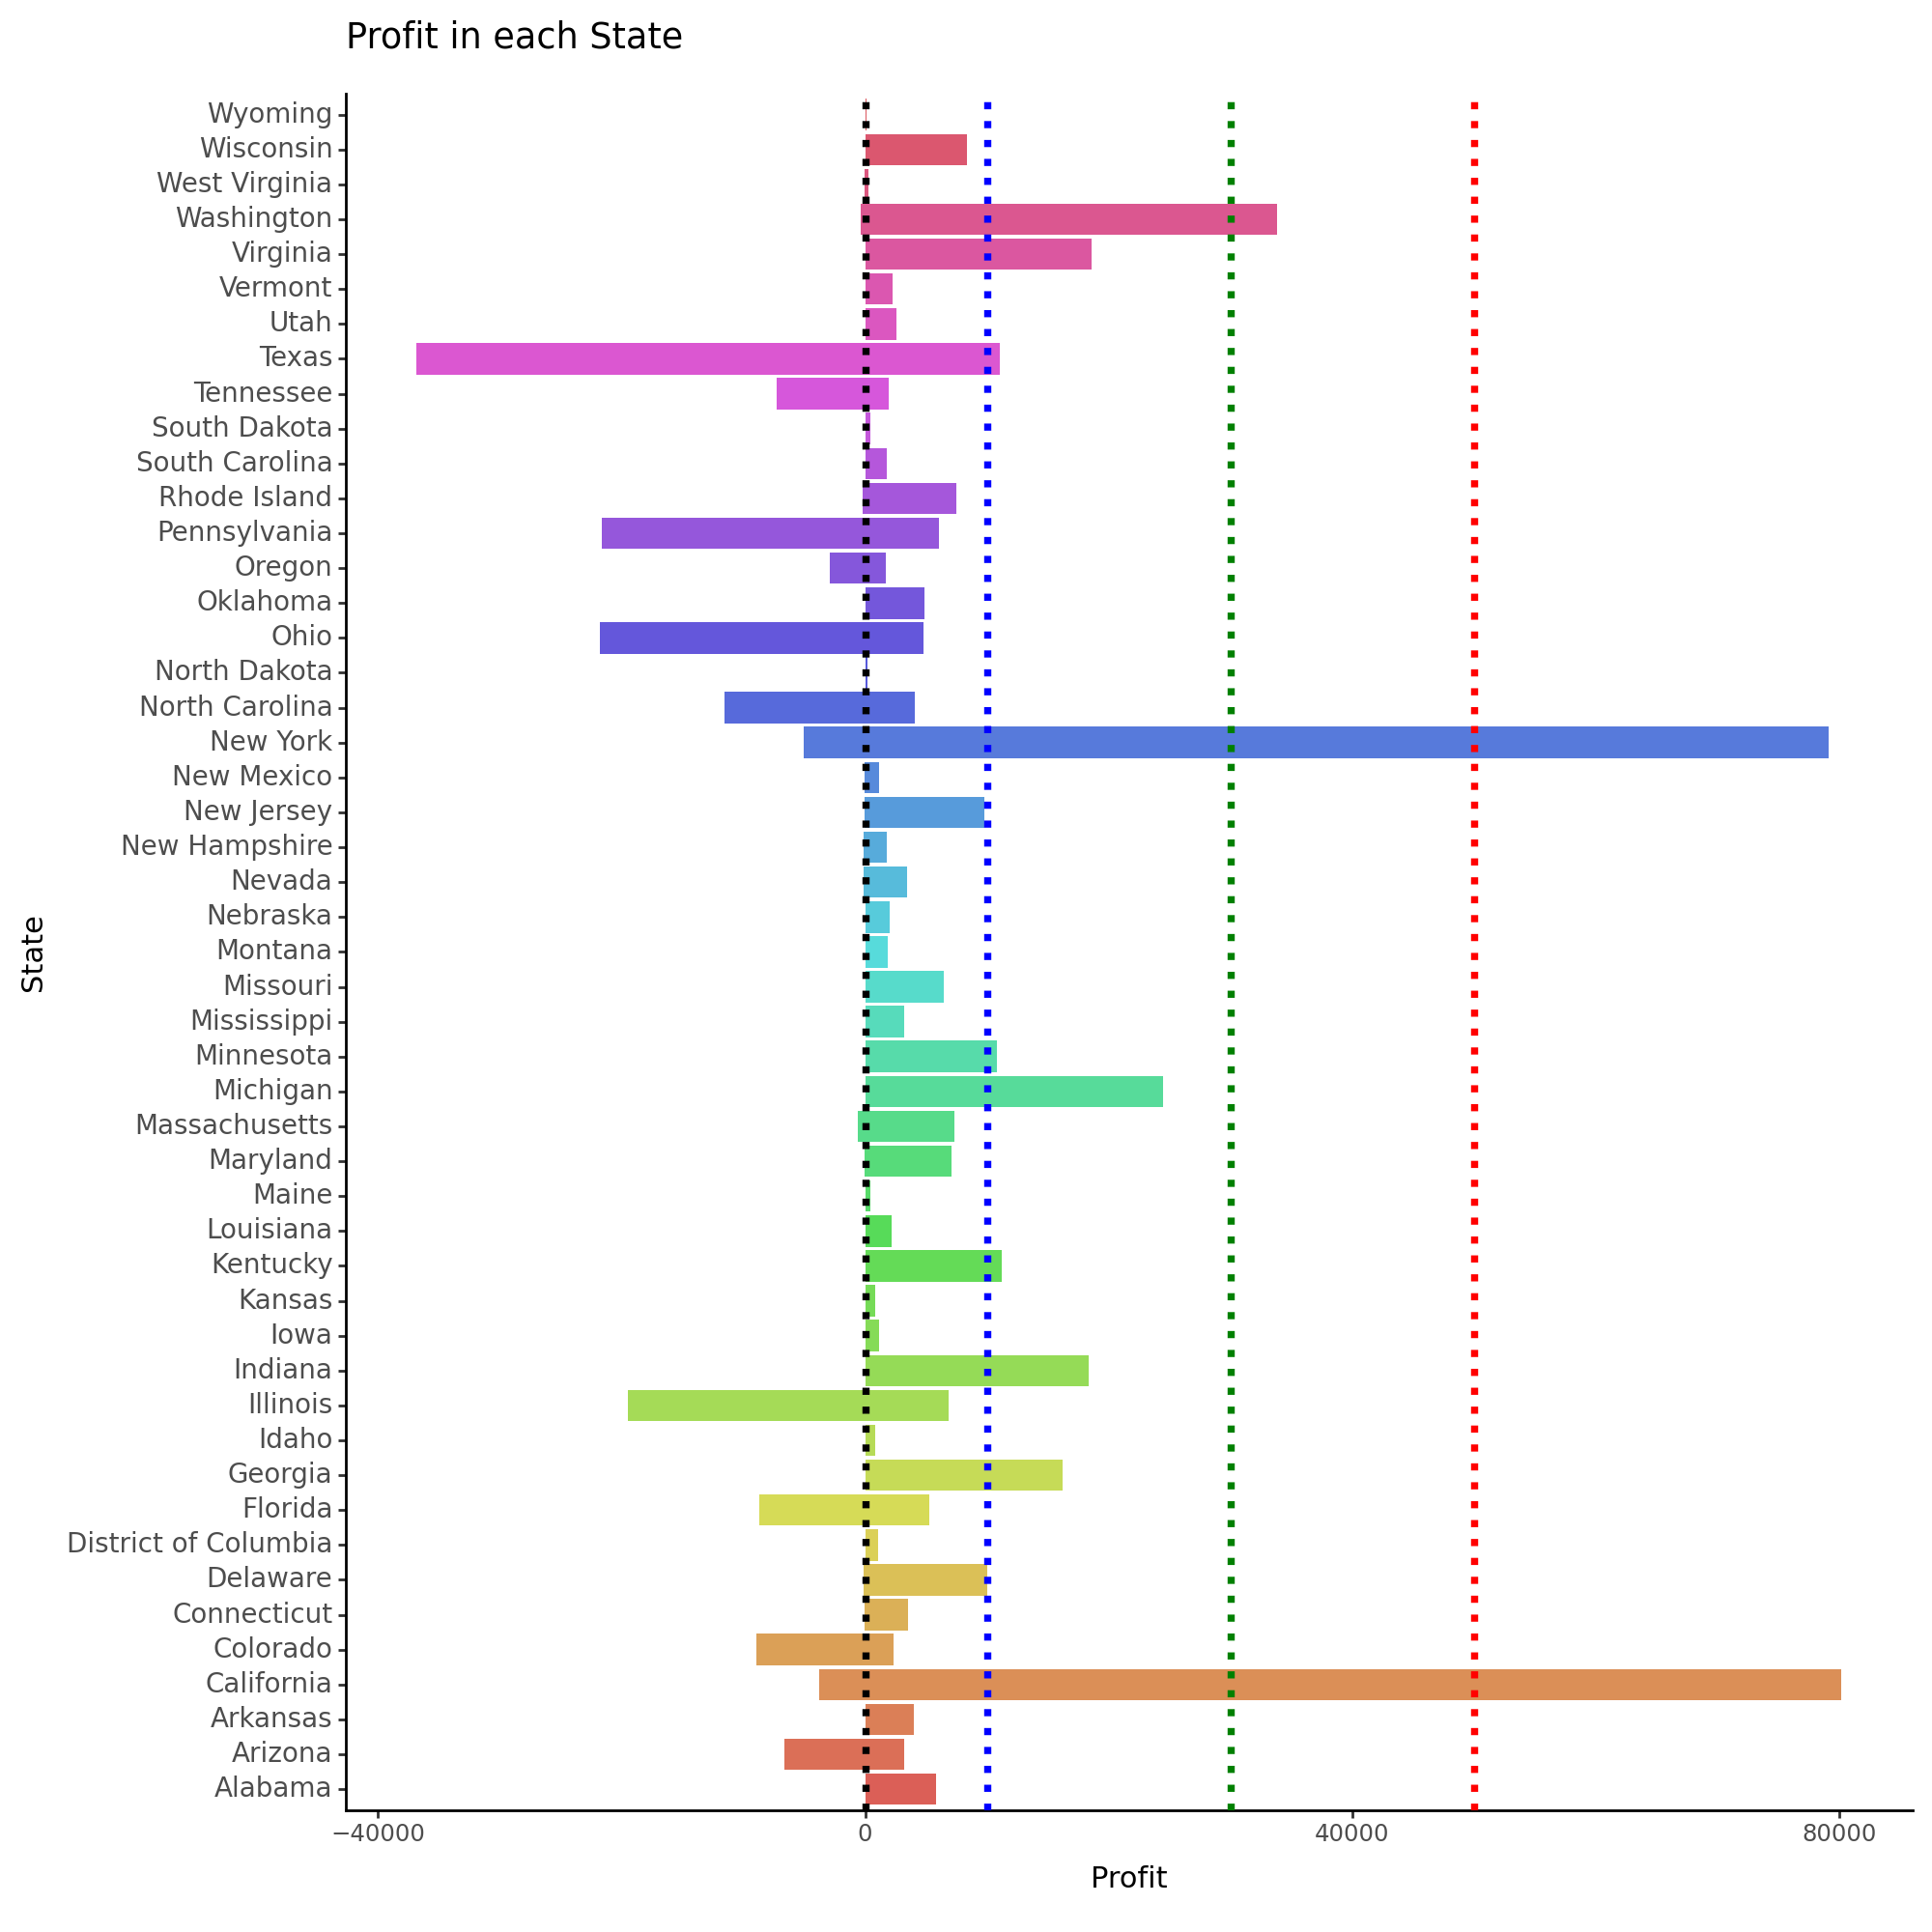

<Figure Size: (1000 x 1000)>

In [9]:
Profit_in_each_state = (ggplot(df, aes(x='State', y='Profit', fill='State')) + geom_col() + coord_flip() + theme_classic()
                 + ggtitle('Profit in each State') + scale_fill_discrete(guide = False)
               + geom_hline(yintercept = 0, linetype="dotted", color = "black", size=1.5)
                + geom_hline(yintercept = 10000, linetype="dotted", color = "blue", size=1.5)
                + geom_hline(yintercept = 30000, linetype="dotted", color = "green", size=1.5)
               + geom_hline(yintercept = 50000, linetype="dotted", color = "red", size=1.5)
               + theme(axis_text_y = element_text(size=10), figure_size=(10,10)))
display(Profit_in_each_state)

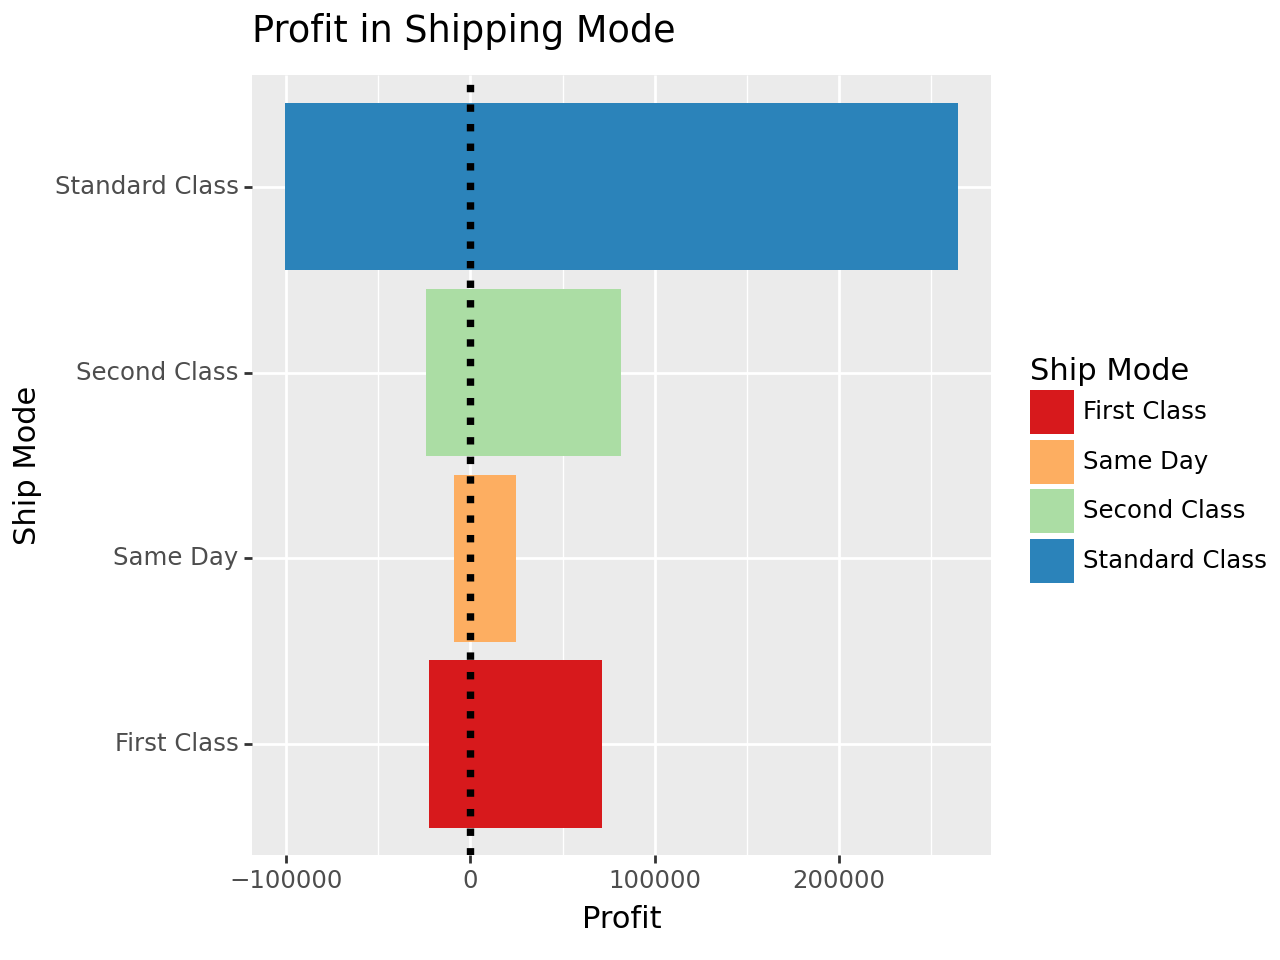

<Figure Size: (640 x 480)>

In [10]:
Profit_in_Shipmode = (ggplot(df, aes(x='Ship Mode', y='Profit', fill='Ship Mode')) + geom_col() + coord_flip()
+ scale_fill_brewer(type='div', palette="Spectral")  + ggtitle('Profit in Shipping Mode')
+ geom_hline(yintercept = 0, linetype="dotted", color = "black", size=1.5))
display(Profit_in_Shipmode)

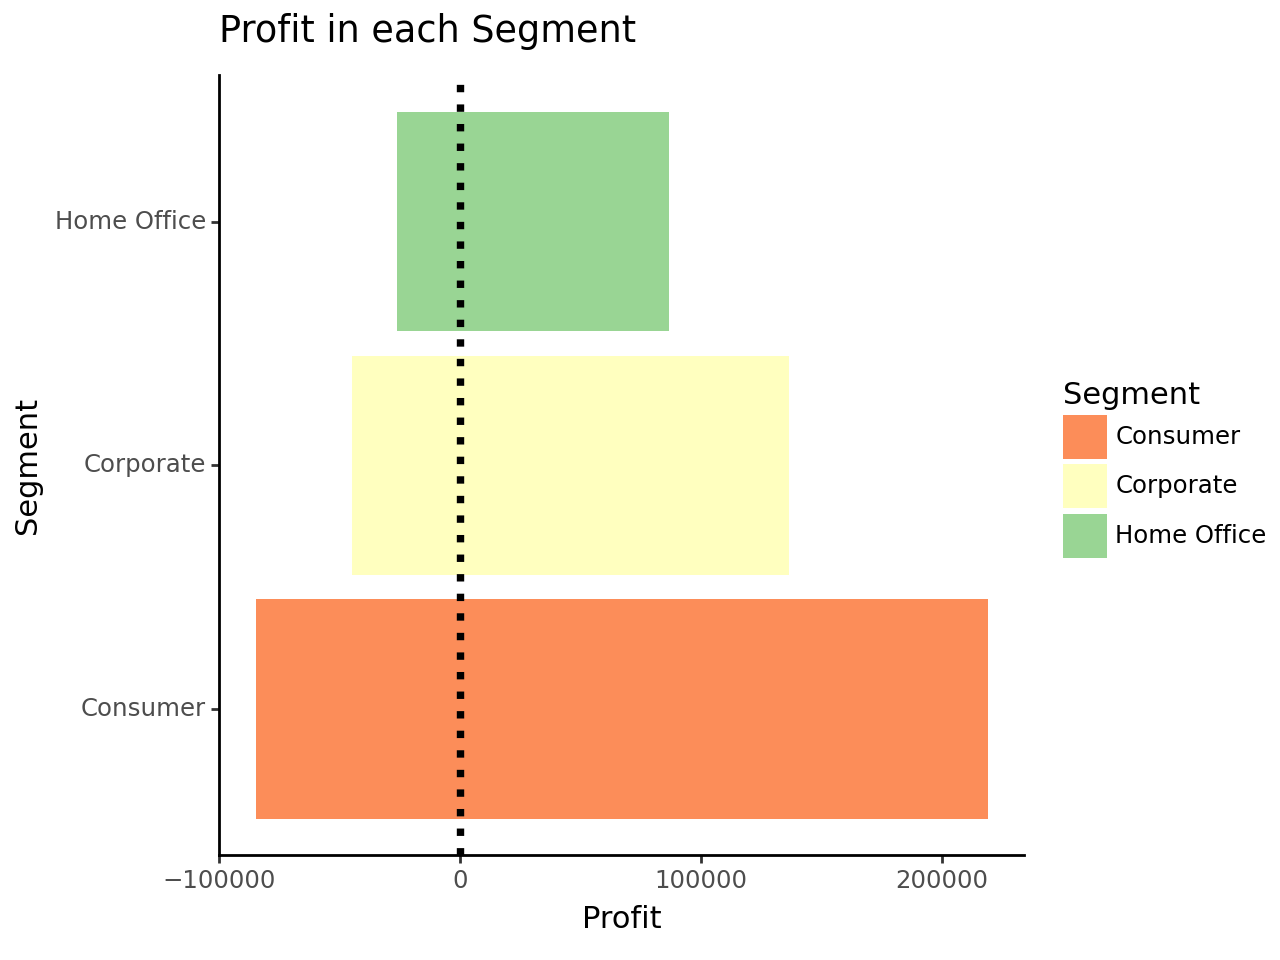

<Figure Size: (640 x 480)>

In [11]:
Profit_in_Segment = (ggplot(df, aes(x='Segment', y='Profit', fill='Segment')) + geom_col() + coord_flip()
+ scale_fill_brewer(type='div', palette="Spectral") + theme_classic() + ggtitle('Profit in each Segment')+
geom_hline(yintercept = 0, linetype="dotted", color = "black", size=1.5))
display(Profit_in_Segment)

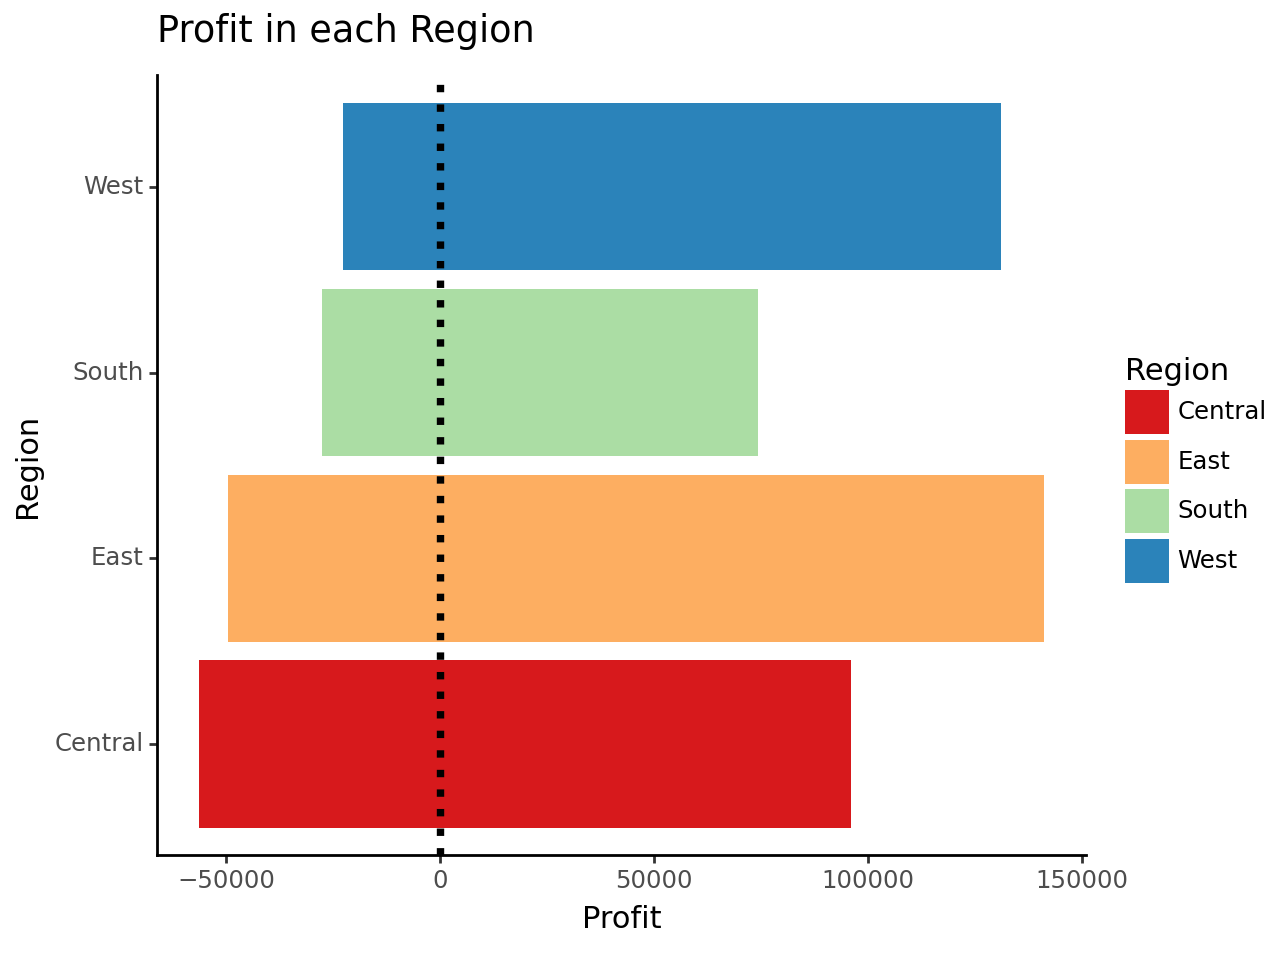

<Figure Size: (640 x 480)>

In [12]:
Profit_in_Region = (ggplot(df, aes(x='Region', y='Profit', fill='Region')) + geom_col() + coord_flip() 
+ scale_fill_brewer(type='div', palette="Spectral") + theme_classic() + ggtitle('Profit in each Region')
+ geom_hline(yintercept = 0, linetype="dotted", color = "black", size=1.5))
display(Profit_in_Region)

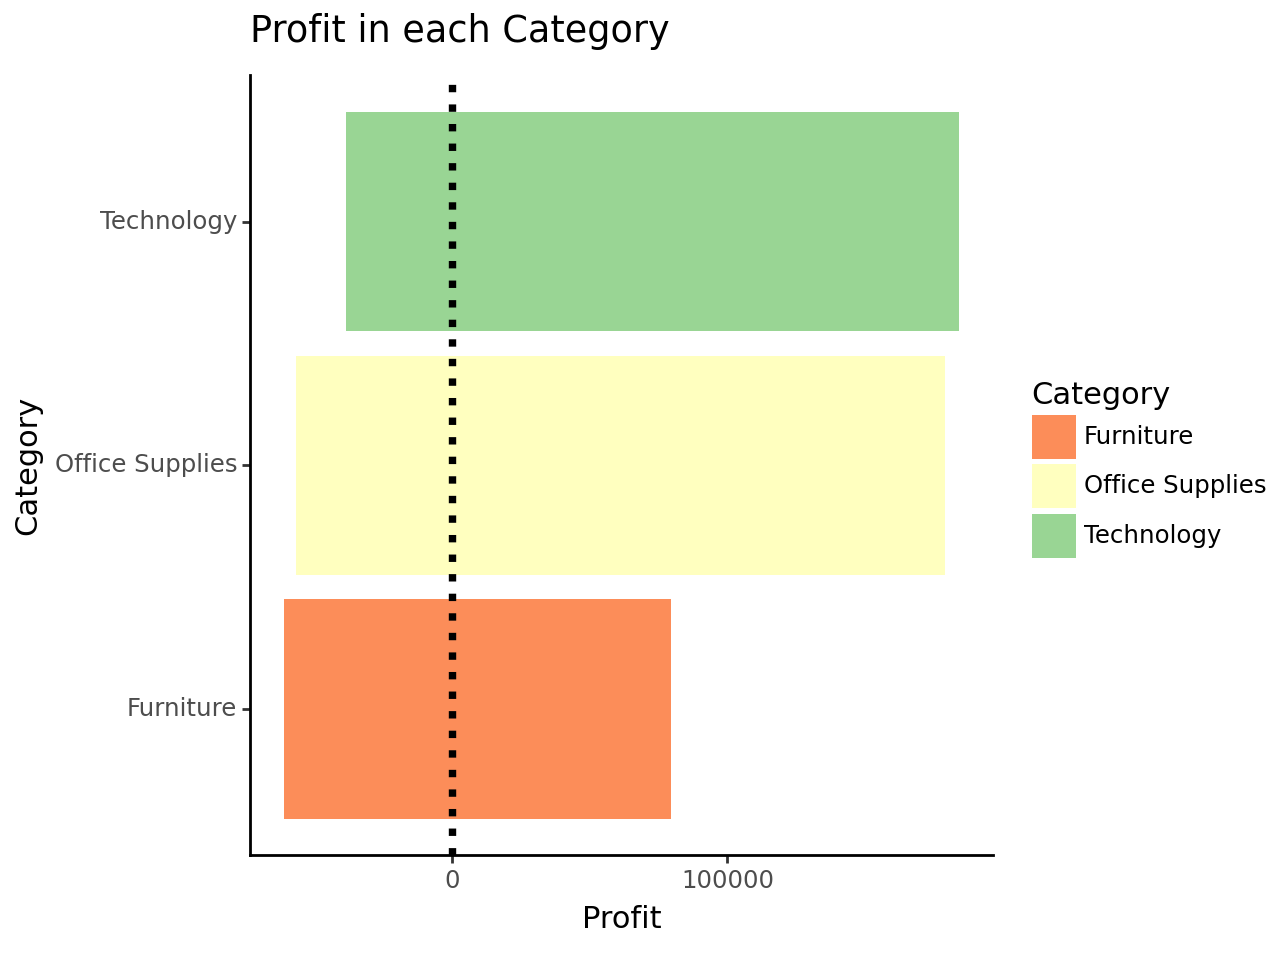

<Figure Size: (640 x 480)>

In [13]:
Profit_in_each_Category = (ggplot(df, aes(x='Category', y='Profit', fill='Category', label = 'Profit')) + geom_col()
+ scale_fill_brewer(type='div', palette="Spectral") + theme_classic() + ggtitle('Profit in each Category')+
geom_hline(yintercept = 0, linetype="dotted", color = "black", size=1.5)+ coord_flip() )
display(Profit_in_each_Category)

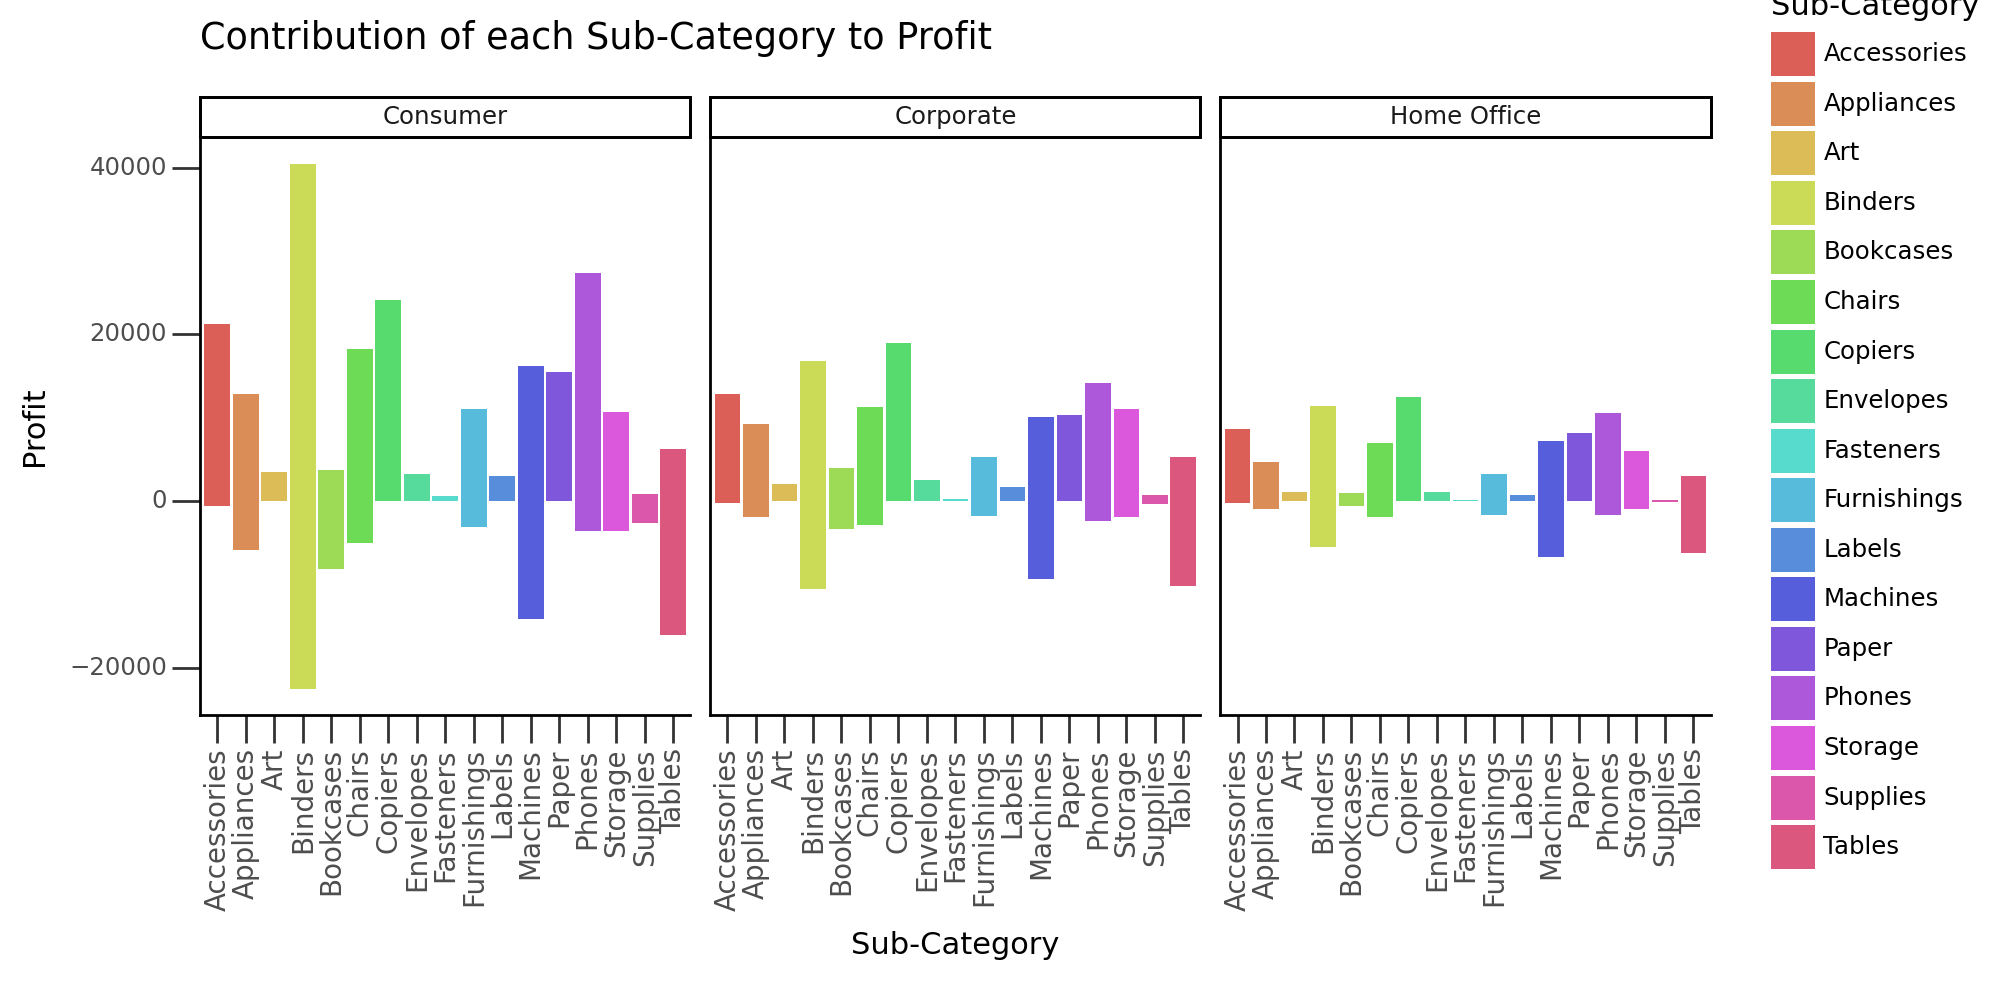

<Figure Size: (1000 x 500)>

In [14]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=0.5),figure_size=(10,5), axis_ticks_length_major=10)
(ggplot(df, aes(x='Sub-Category',y='Profit', fill='Sub-Category')) + theme_classic() + geom_col() + facet_wrap(['Segment']) 
 + flip_xlabels + theme(axis_text_x = element_text(size = 10)) + ggtitle("Contribution of each Sub-Category to Profit"))

 **_FUNCTION TO CALCULATE BEST AND WORST PROFIT YIELDING SECTIONS_**

In [15]:
def products(states,X):
    product_df = df.groupby(X)
    for data in data_arr:
        df_1 = product_df.get_group(data).groupby(['Category'])
        fig, ax = plt.subplots(1, 3, figsize = (20,5))
        fig.suptitle(data, fontsize=14)        
        ax_index = 0
        for category in ['Furniture', 'Office Supplies', 'Technology']:
            category_df = df_1.get_group(category).groupby(['Sub-Category']).sum()
            sns.barplot(x = category_df.Profit, y =  category_df.index, ax = ax[ax_index])
            ax[ax_index].set_ylabel(category)
            ax_index +=1
        fig.show()

*__HIGHEST AND LOWEST PROFIT SEGMENT__*

In [16]:
df_segment = df.groupby(['Segment'])[['Sales', 'Discount', 'Profit']].mean()
df_segment

,Sales,Discount,Profit
Segment,,,
Consumer,223.733644,0.158141,25.836873
Corporate,233.823300,0.158228,30.456667
Home Office,240.972041,0.147128,33.818664


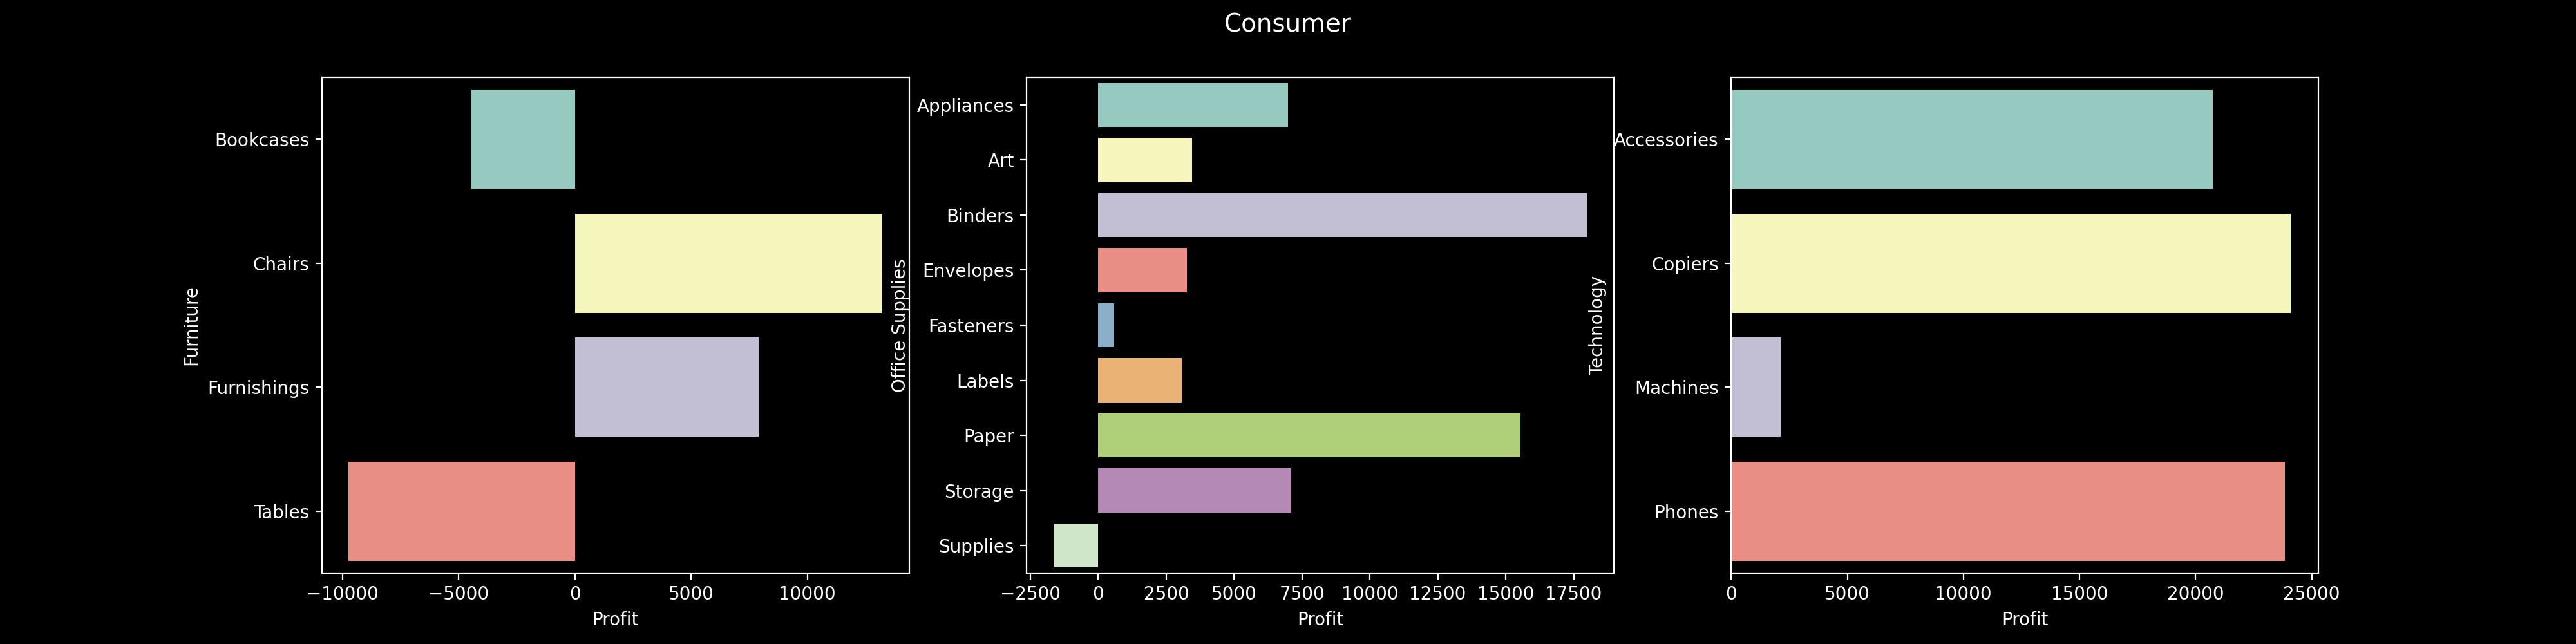

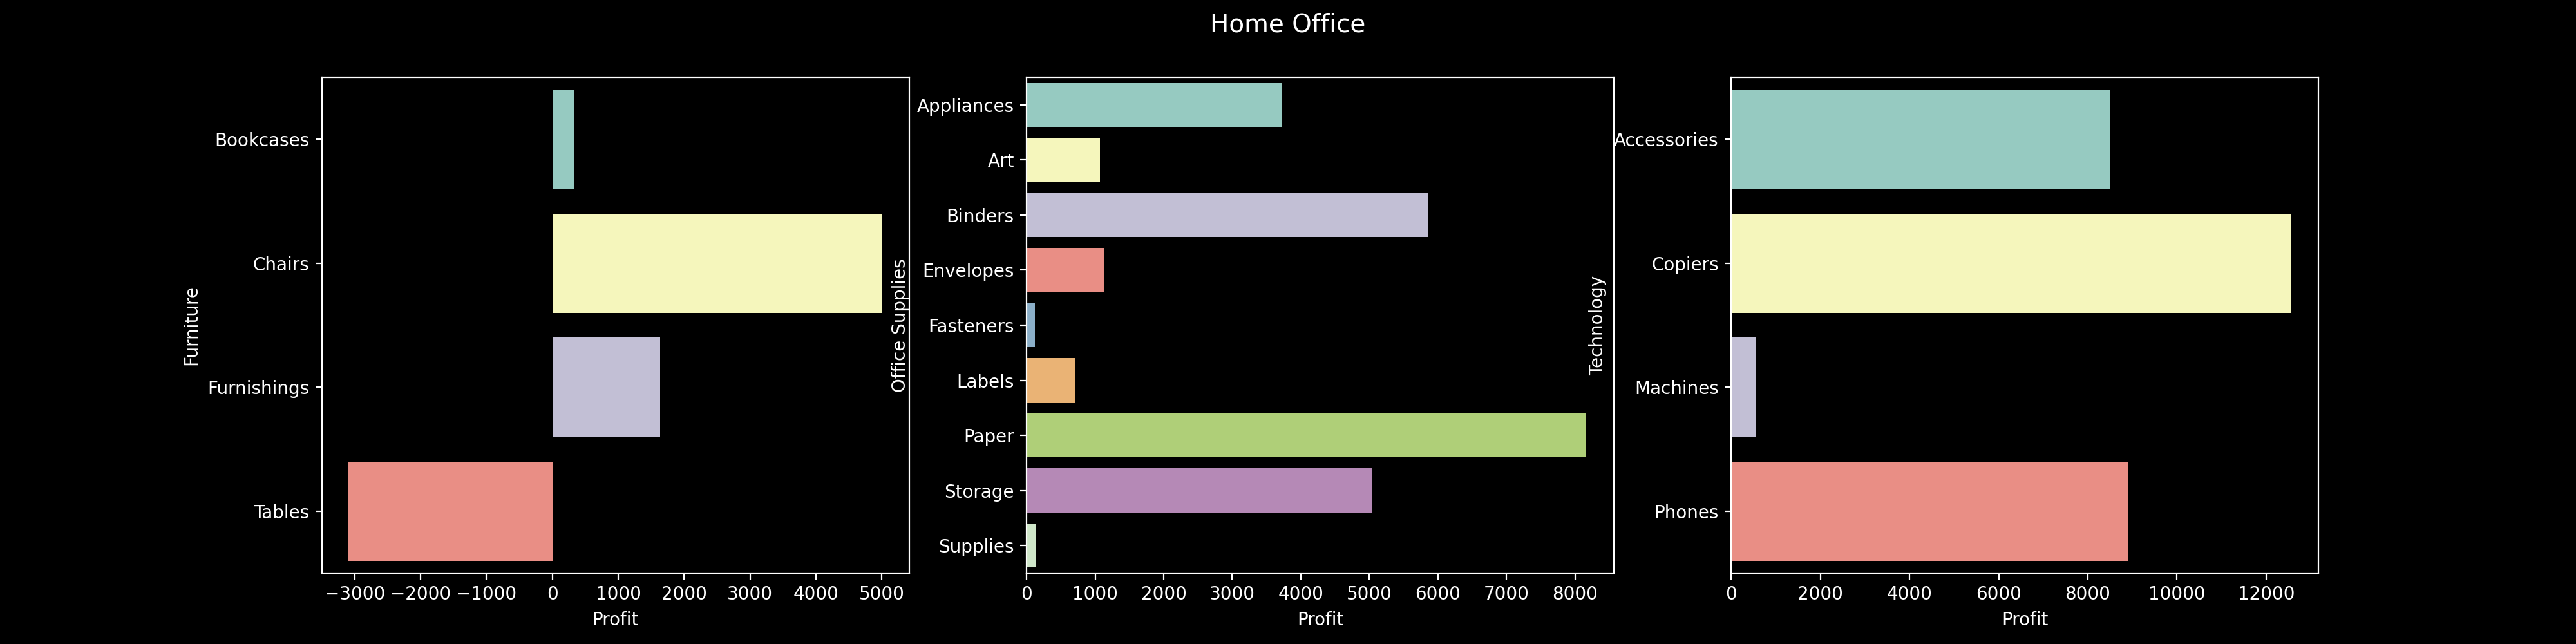

In [17]:
data_arr = ['Consumer','Home Office']
X = ['Segment']
products(data_arr,X)

*__HIGHEST AND LOWEST PROFIT REGION__*

In [18]:
df_region = df.groupby(['Region'])[['Sales', 'Discount', 'Profit']].mean()
df_region

,Sales,Discount,Profit
Region,,,
Central,215.772661,0.240353,17.092709
East,238.336110,0.145365,32.135808
South,241.803645,0.147253,28.857673
West,226.493233,0.109335,33.849032


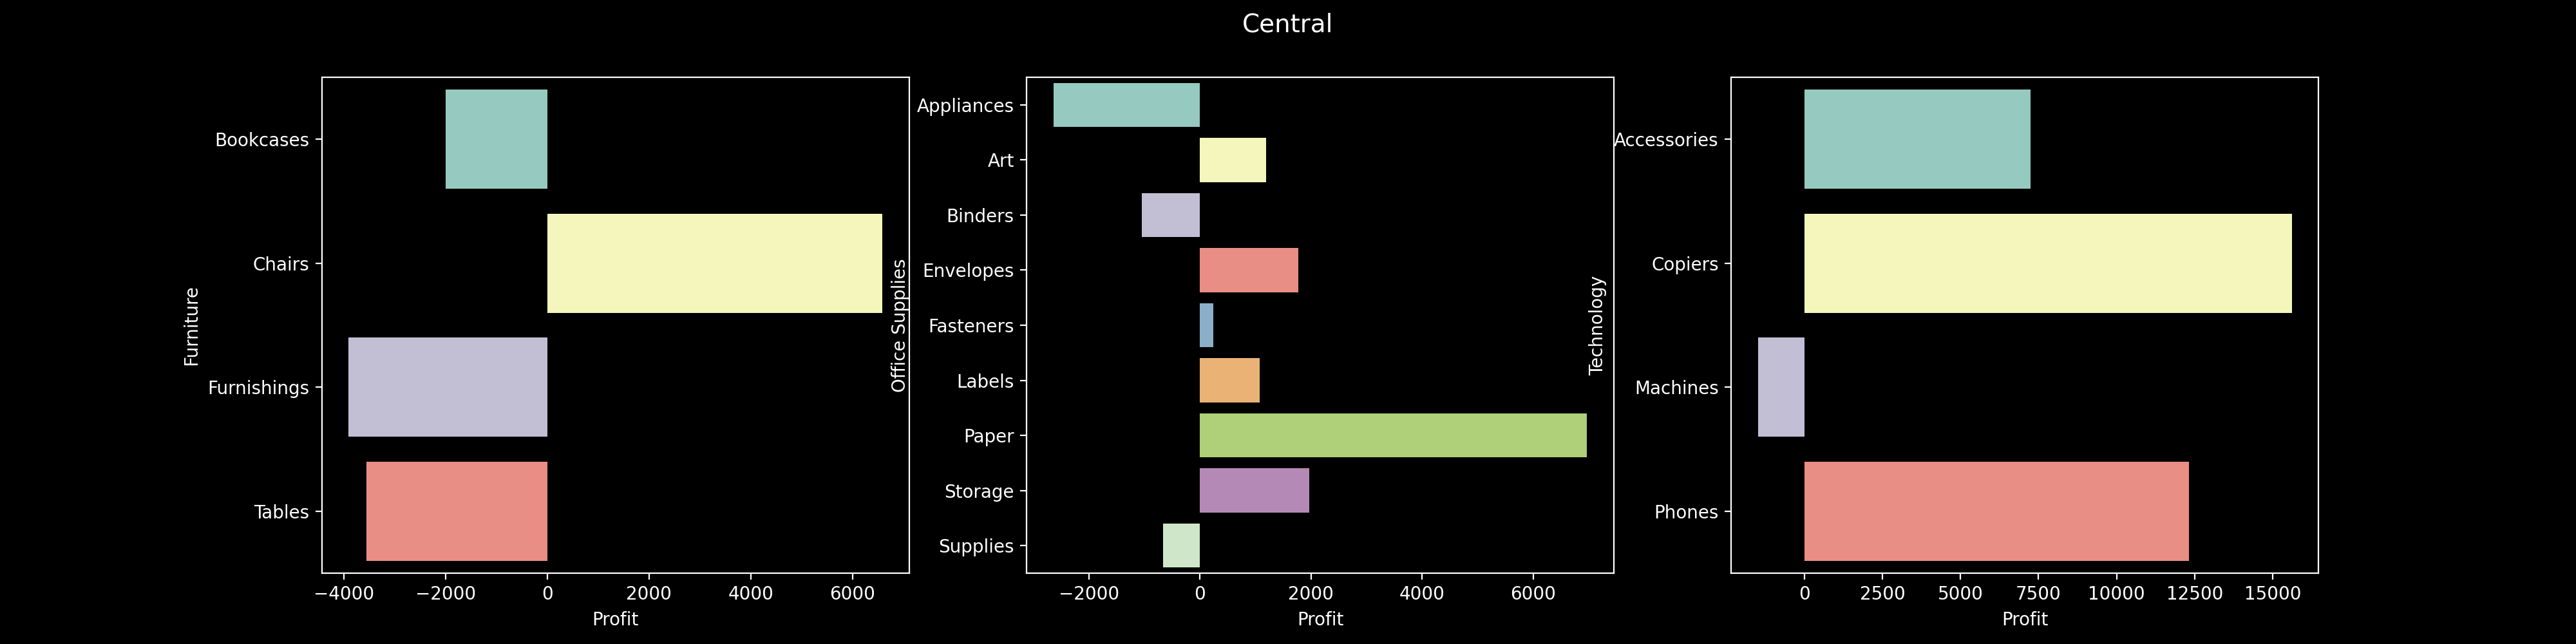

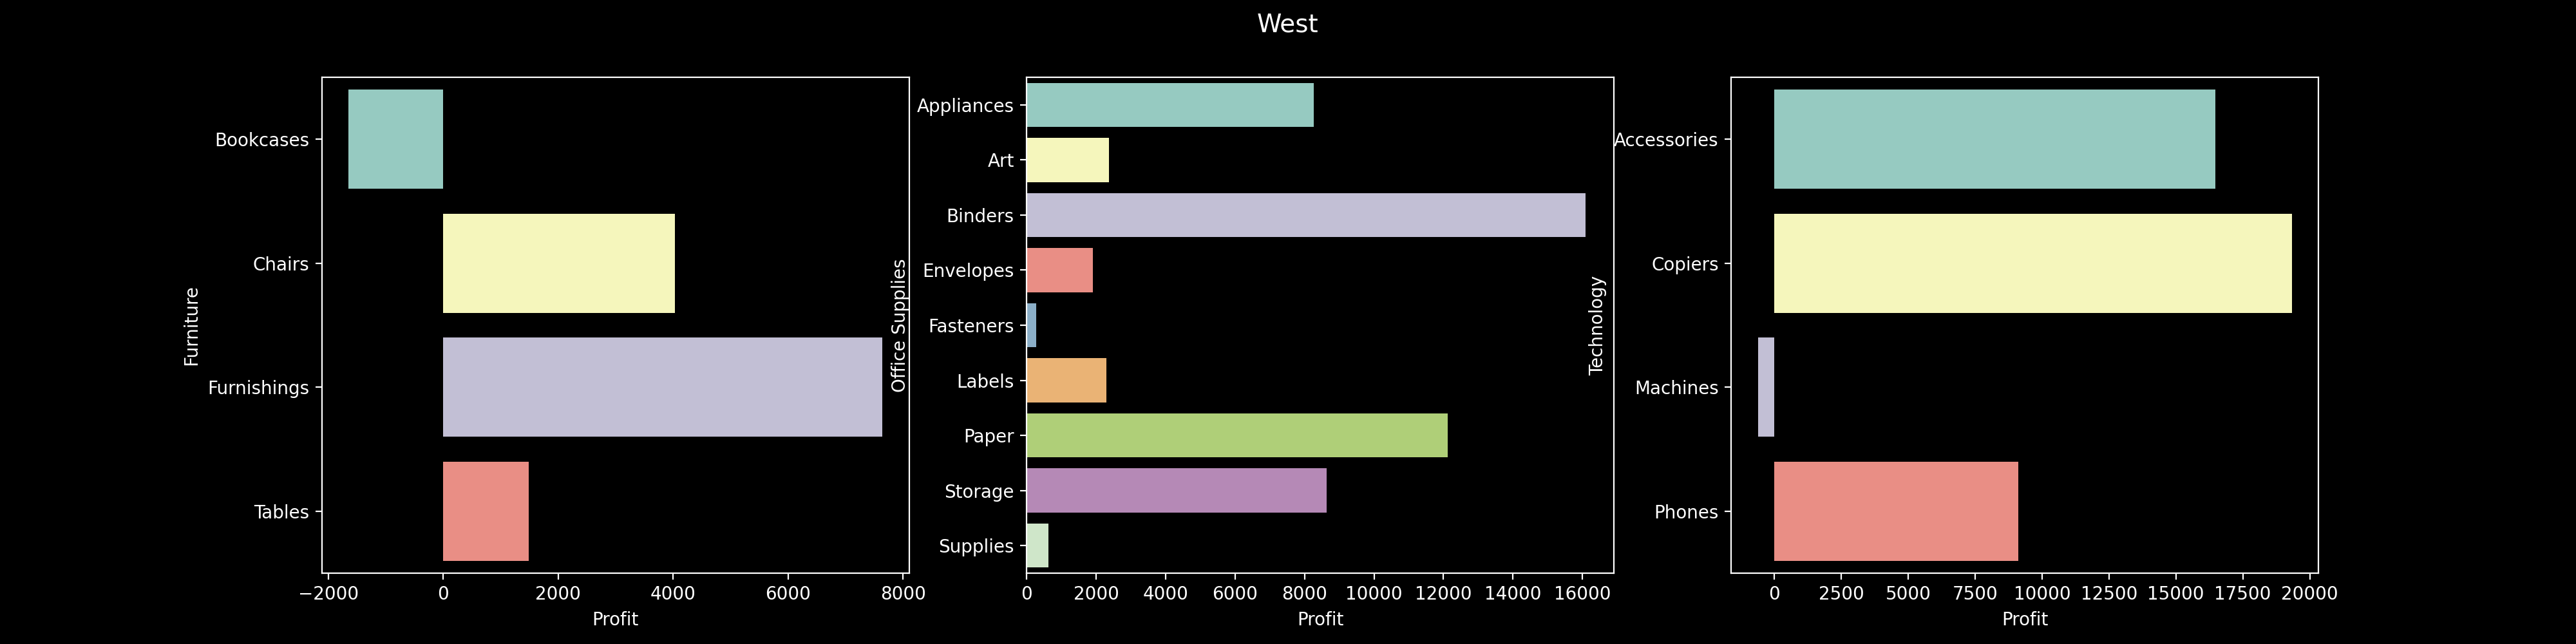

In [19]:
data_arr = ['Central','West']
X = ['Region']
products(data_arr,X)

*__HIGHEST AND LOWEST PROFIT YIELDING STATE__*

In [20]:
df_state = df.groupby(['State'])[['Sales', 'Discount', 'Profit']].mean().sort_values('Profit')
df_state.head(10)

,Sales,Discount,Profit
State,,,
Ohio,166.861697,0.324947,-36.186304
Colorado,176.418231,0.316484,-35.867351
North Carolina,223.305880,0.283534,-30.083985
Tennessee,167.551219,0.291257,-29.189583
Pennsylvania,198.487077,0.328620,-26.507598
Texas,172.779742,0.370193,-26.121174
Illinois,162.939230,0.390041,-25.625787
Arizona,157.508933,0.303571,-15.303235
Oregon,140.573790,0.288710,-9.600569


In [21]:
df_state.tail()

,Sales,Discount,Profit
State,,,
Minnesota,335.541011,0.000000,121.608847
Montana,372.623467,0.066667,122.221900
Indiana,359.431946,0.000000,123.375411
Rhode Island,404.070643,0.021429,130.100523
Vermont,811.760909,0.000000,204.088936


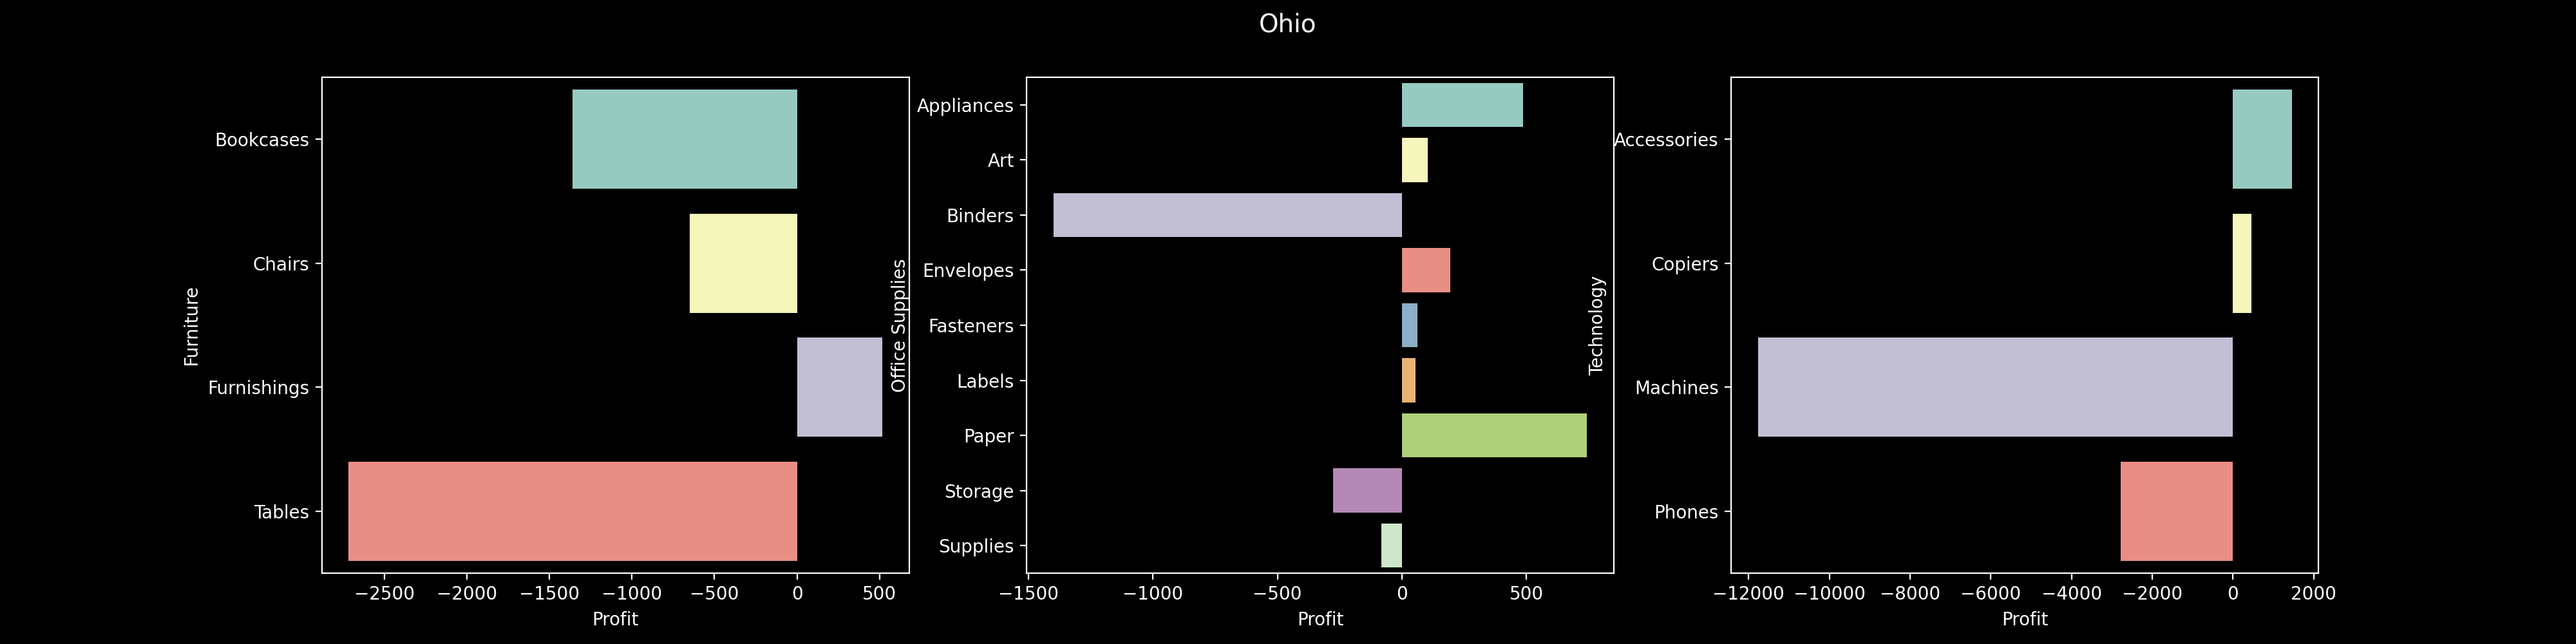

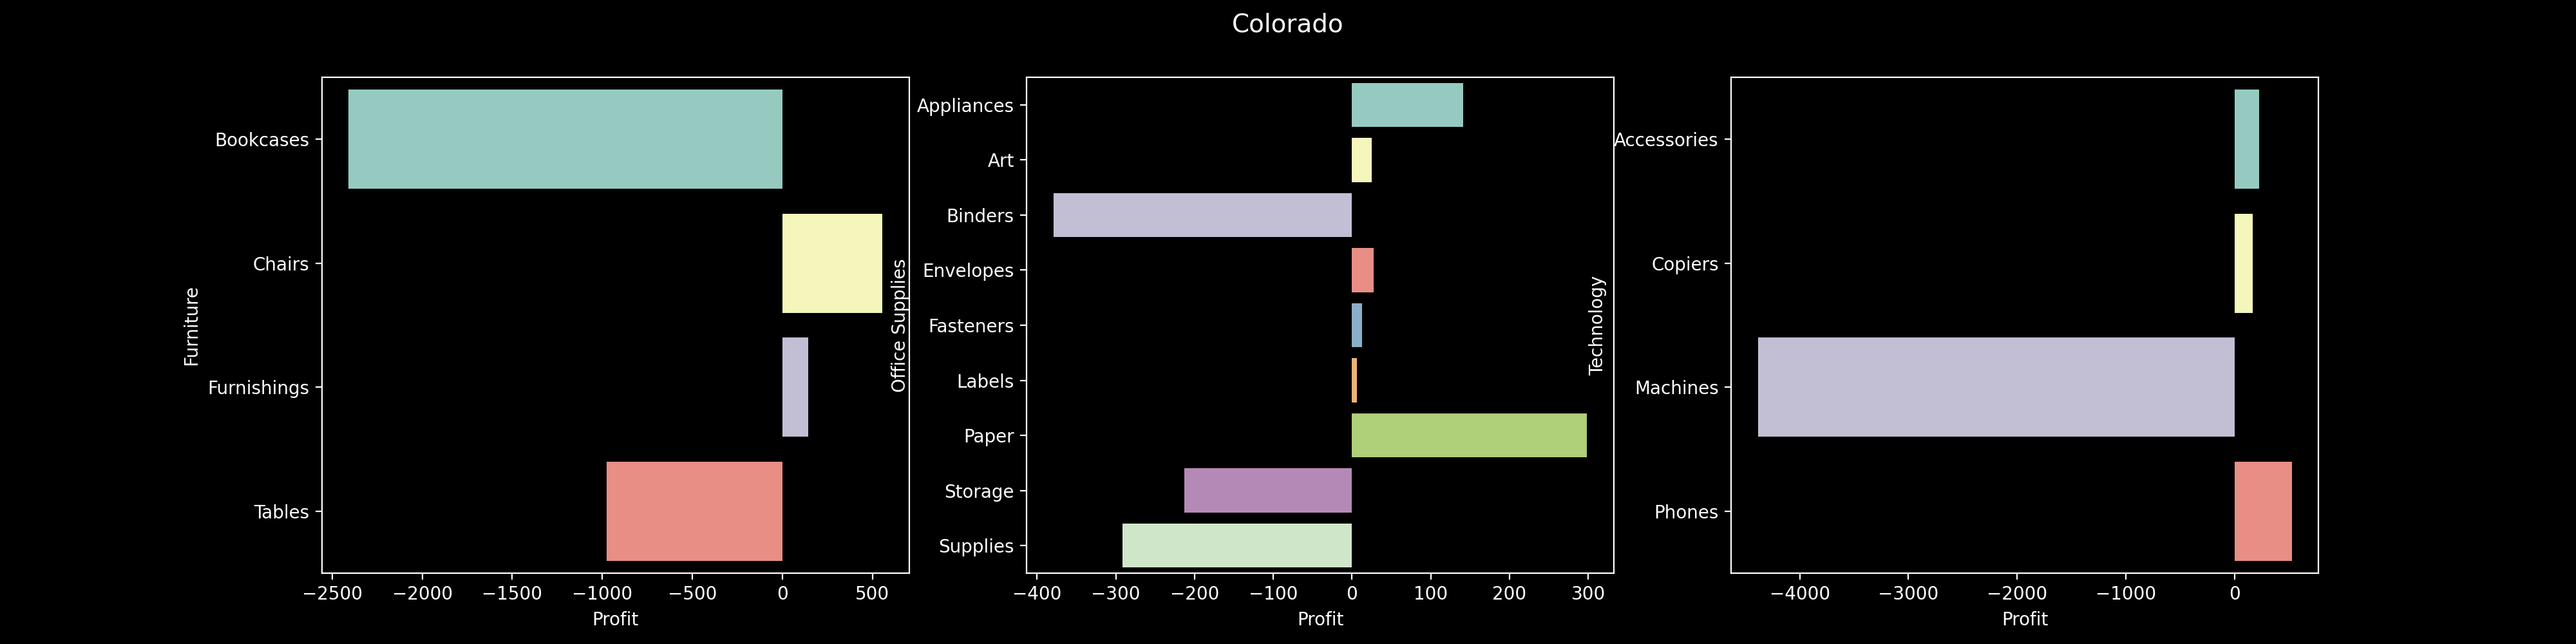

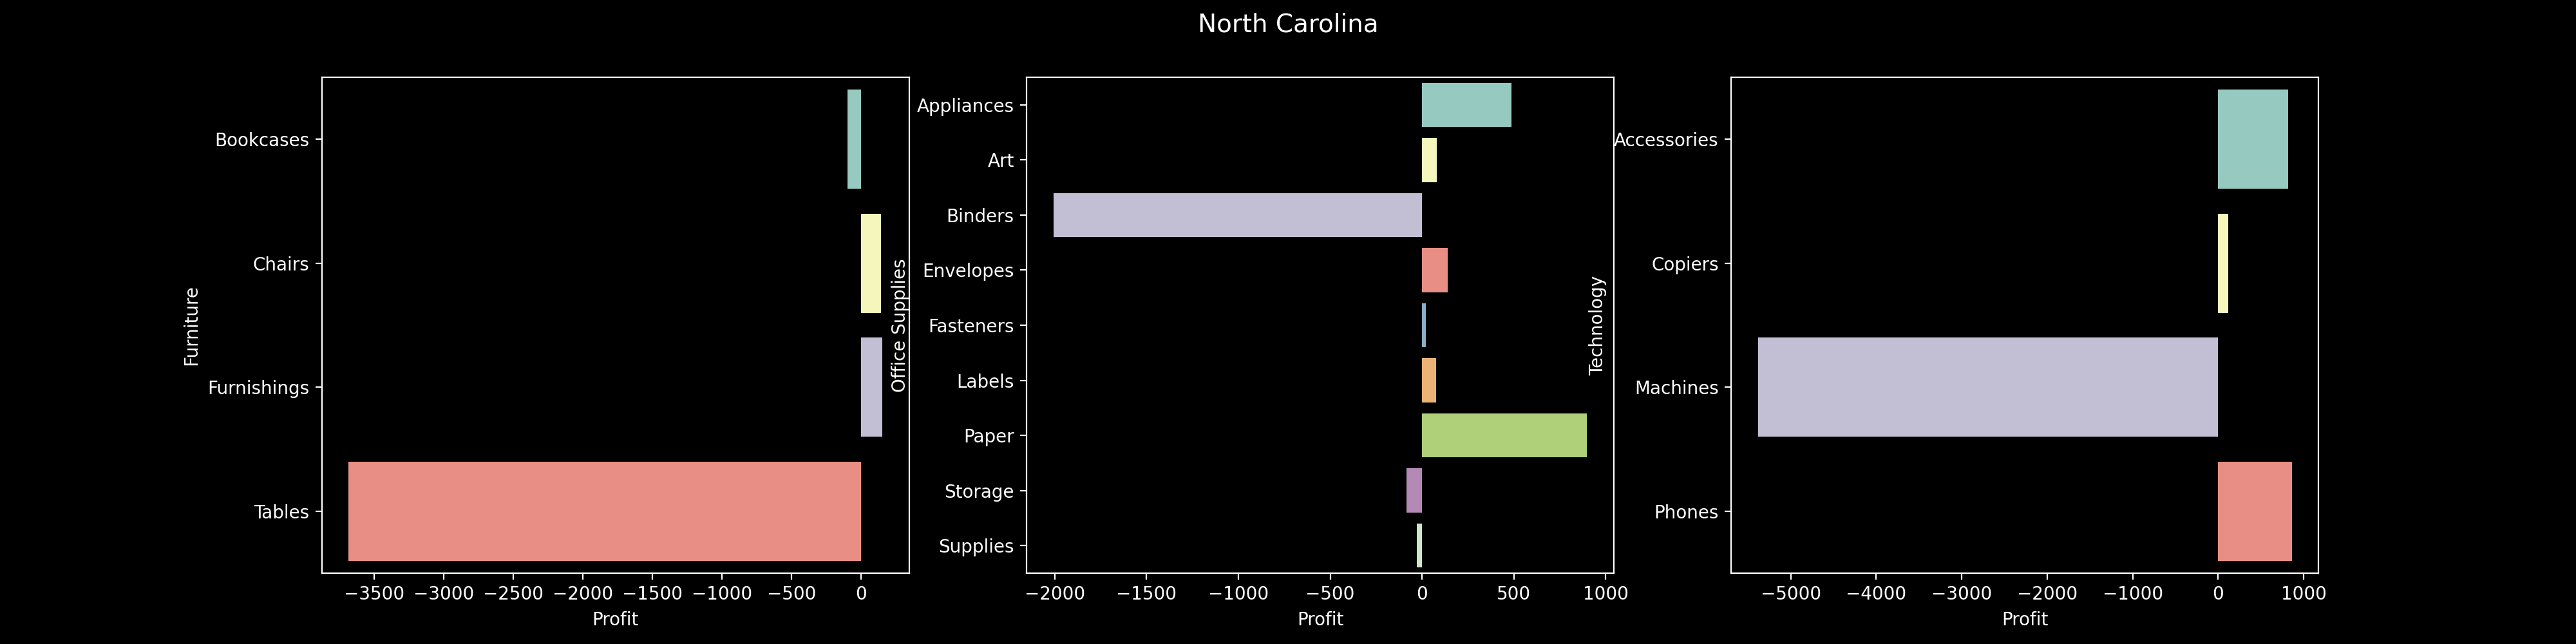

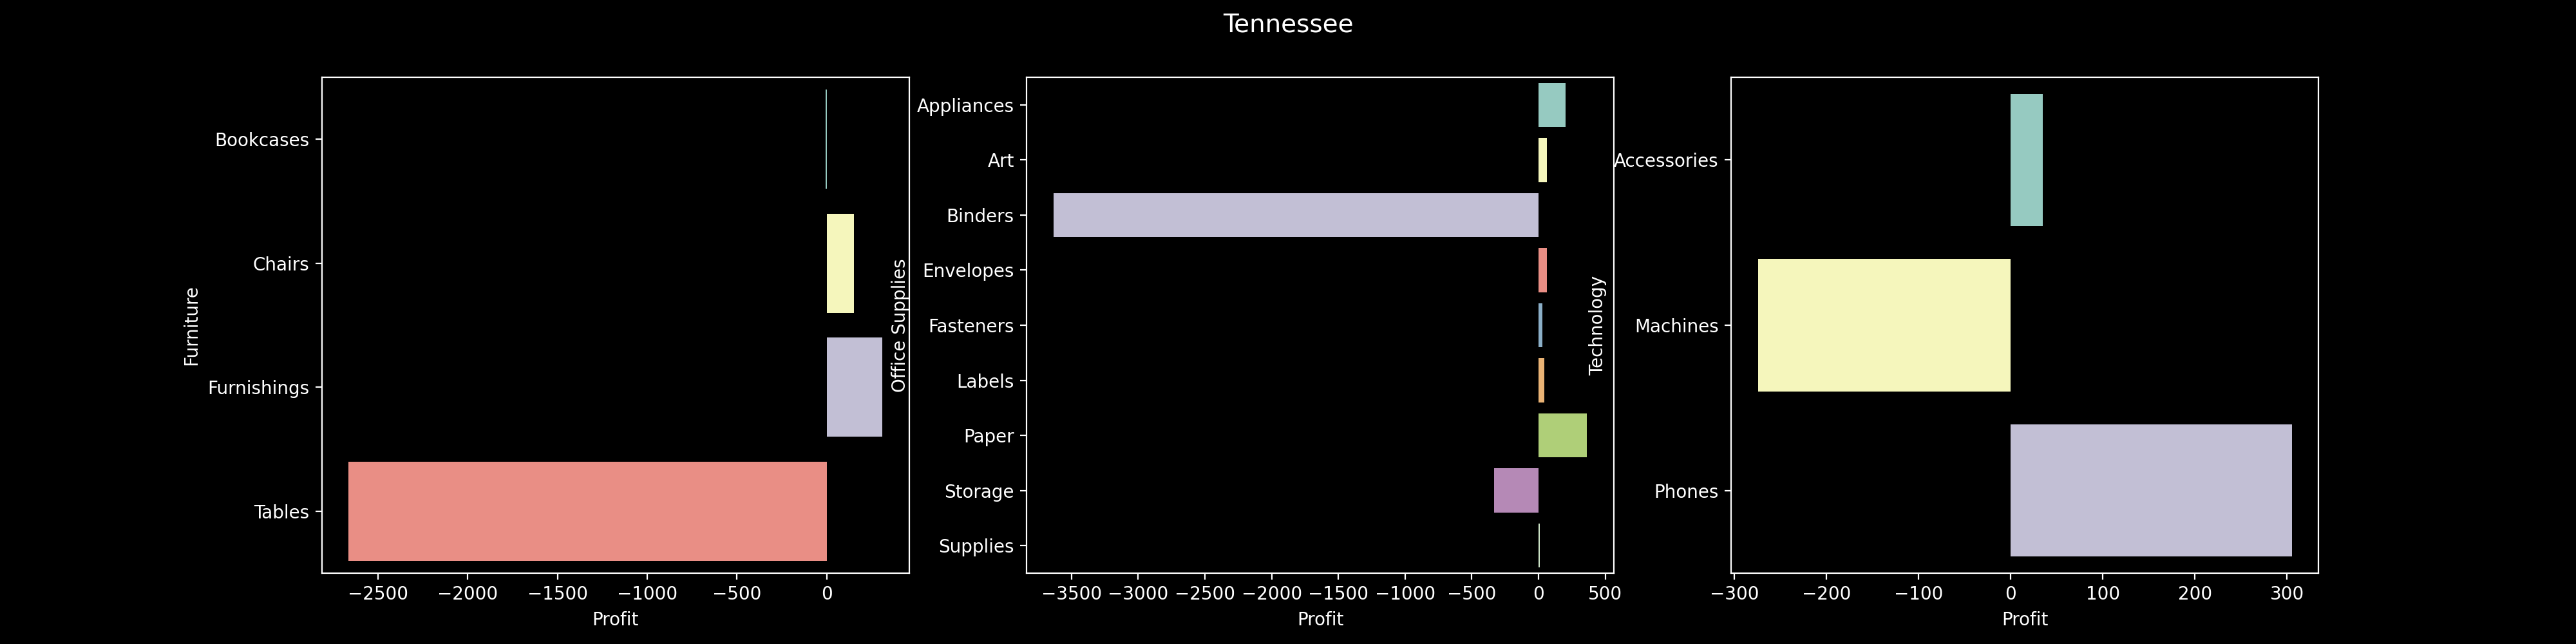

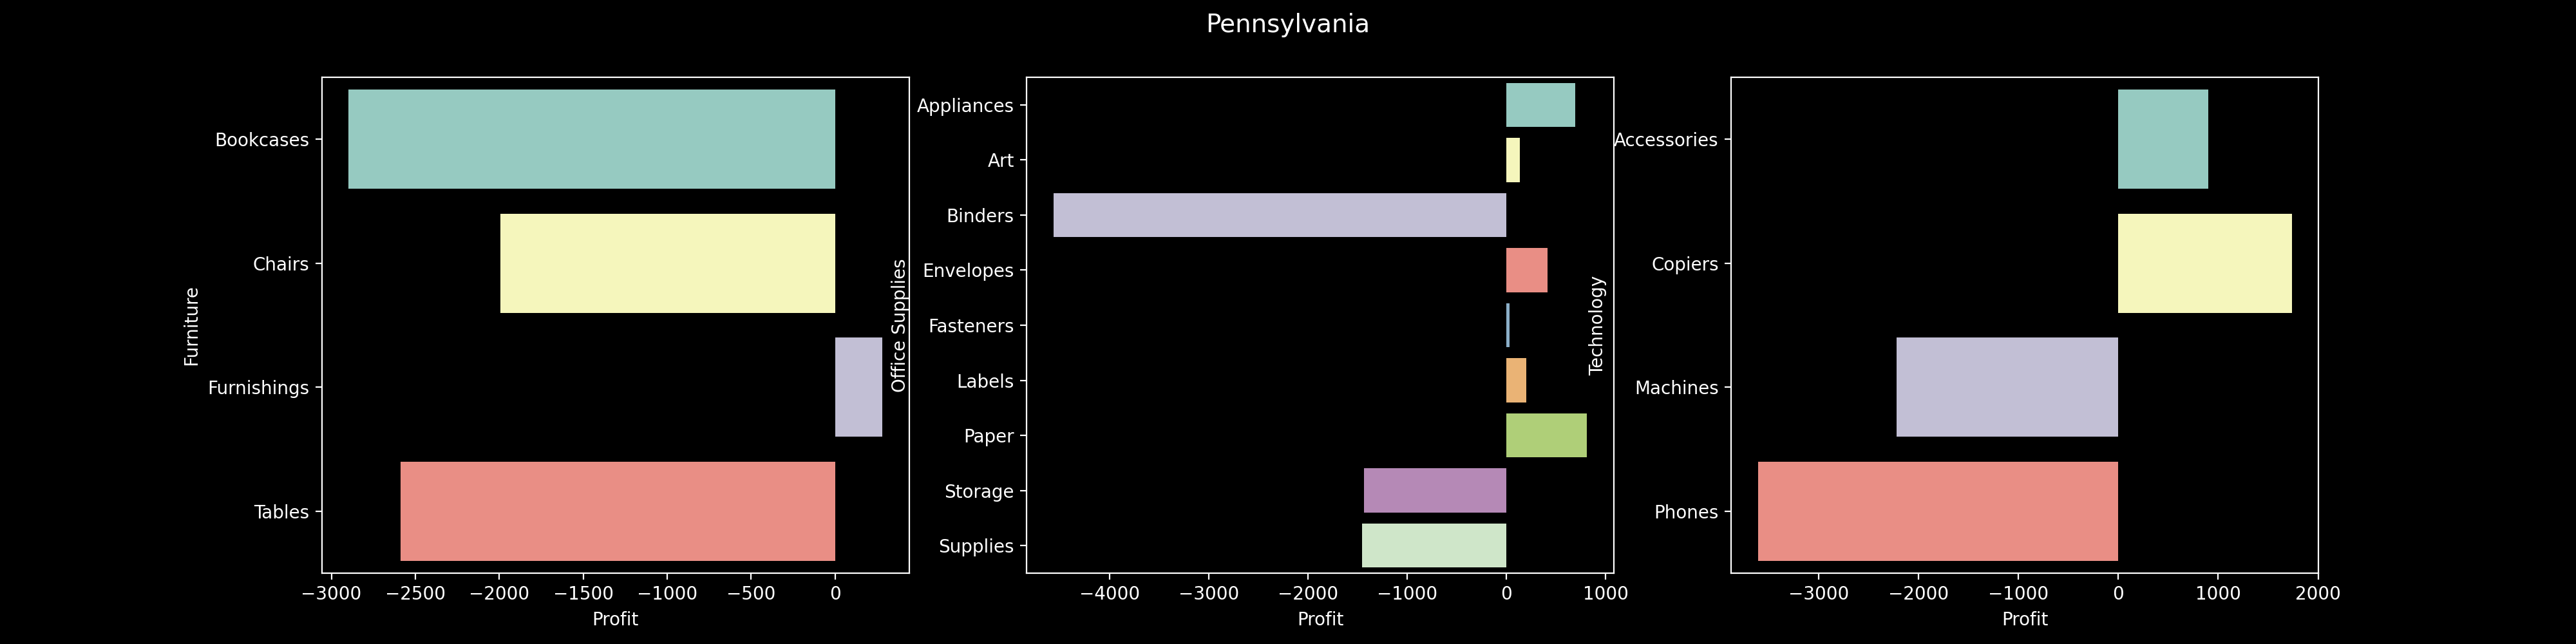

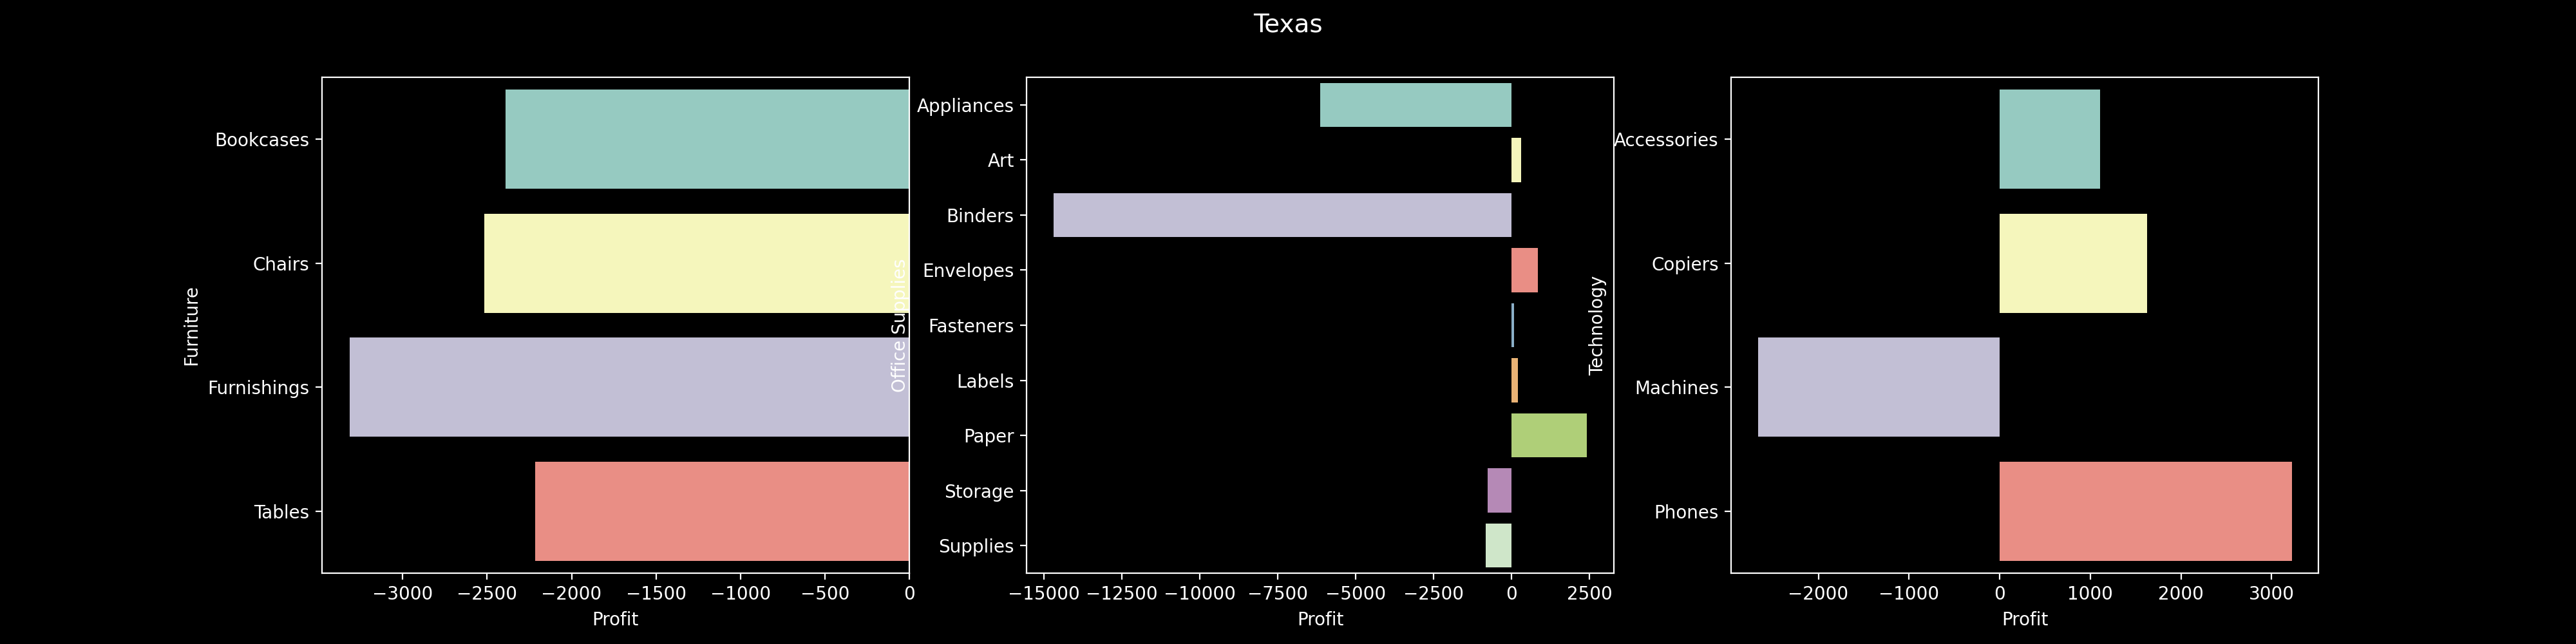

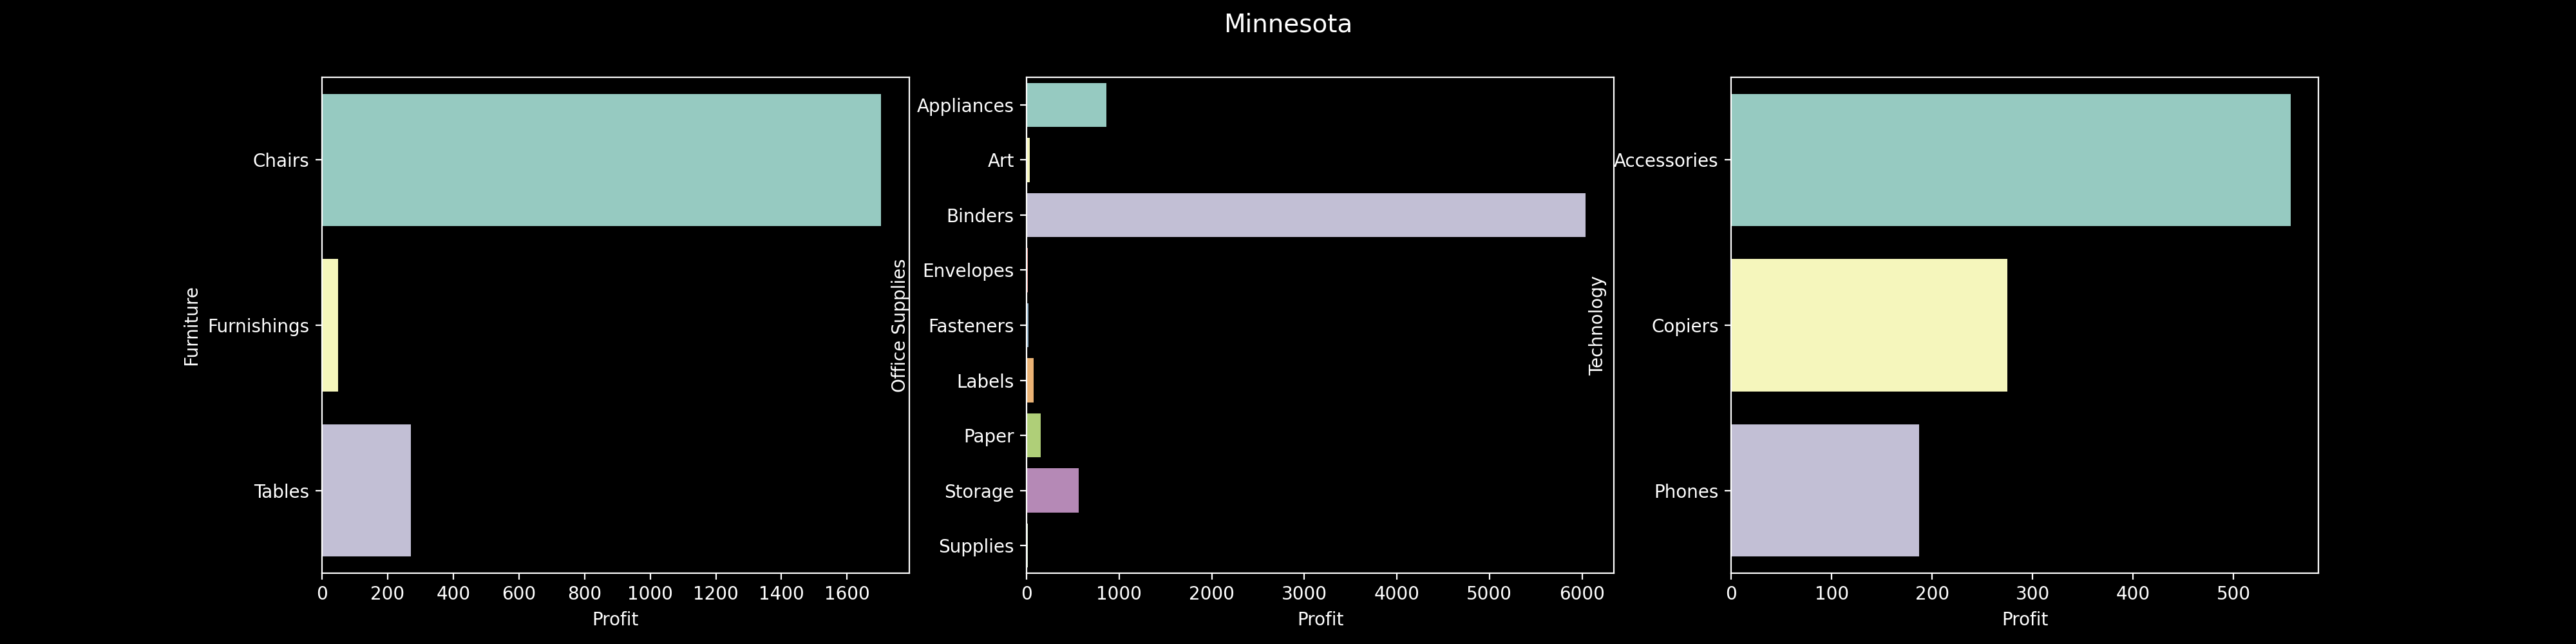

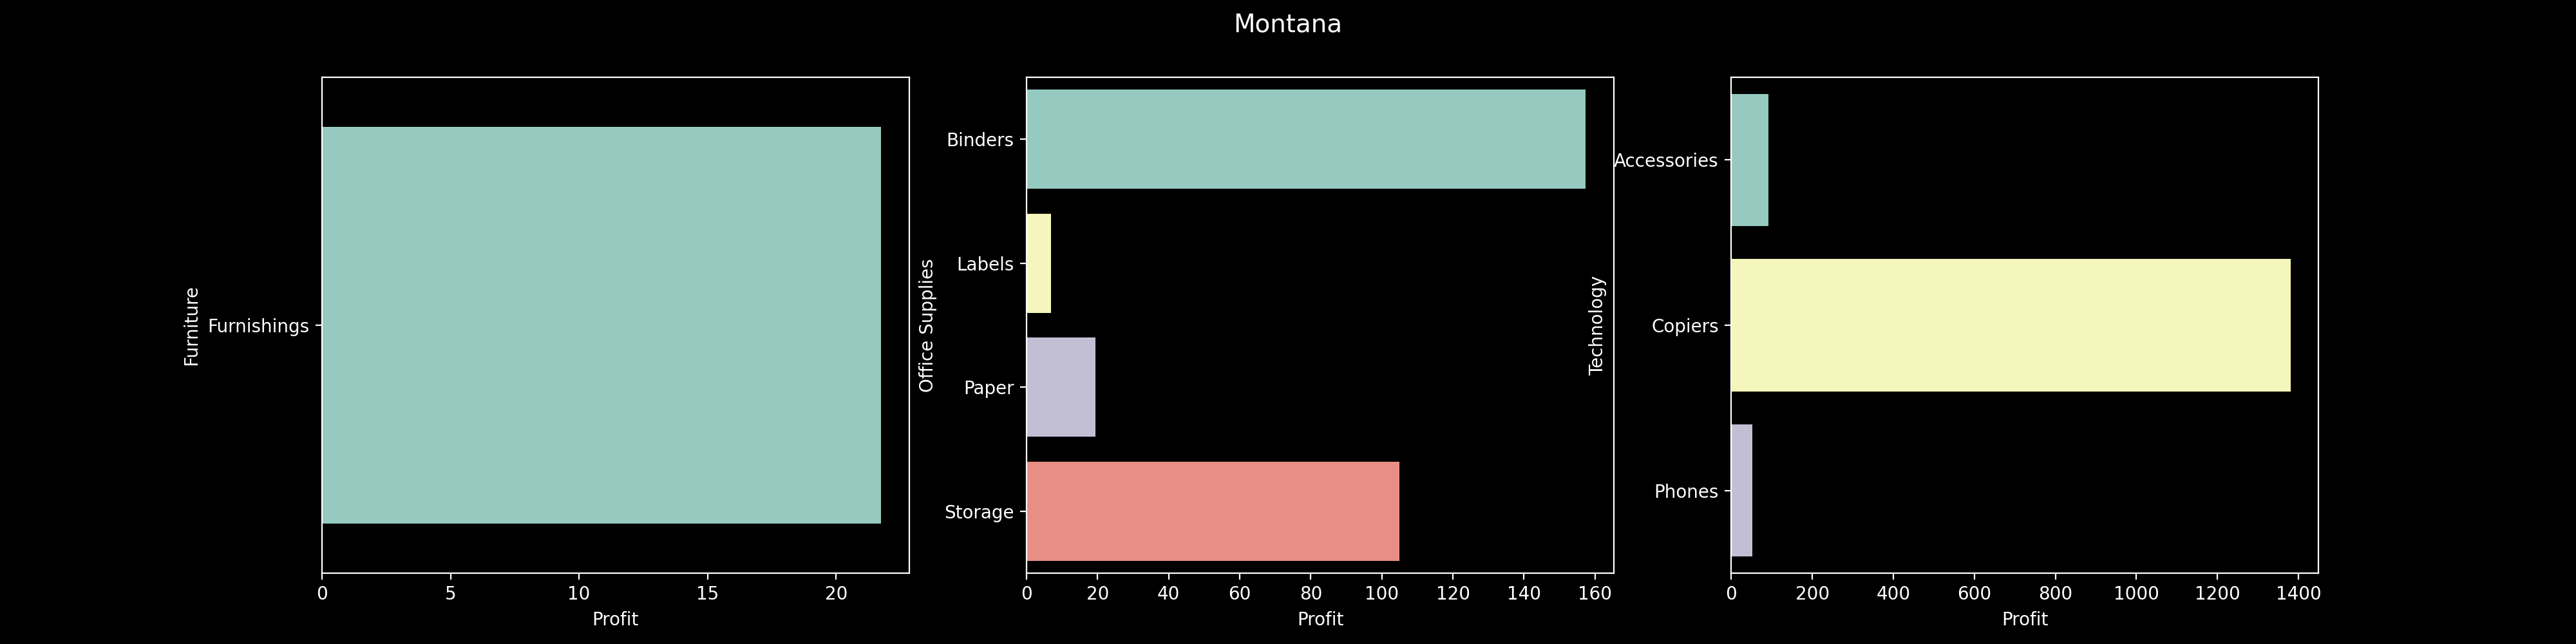

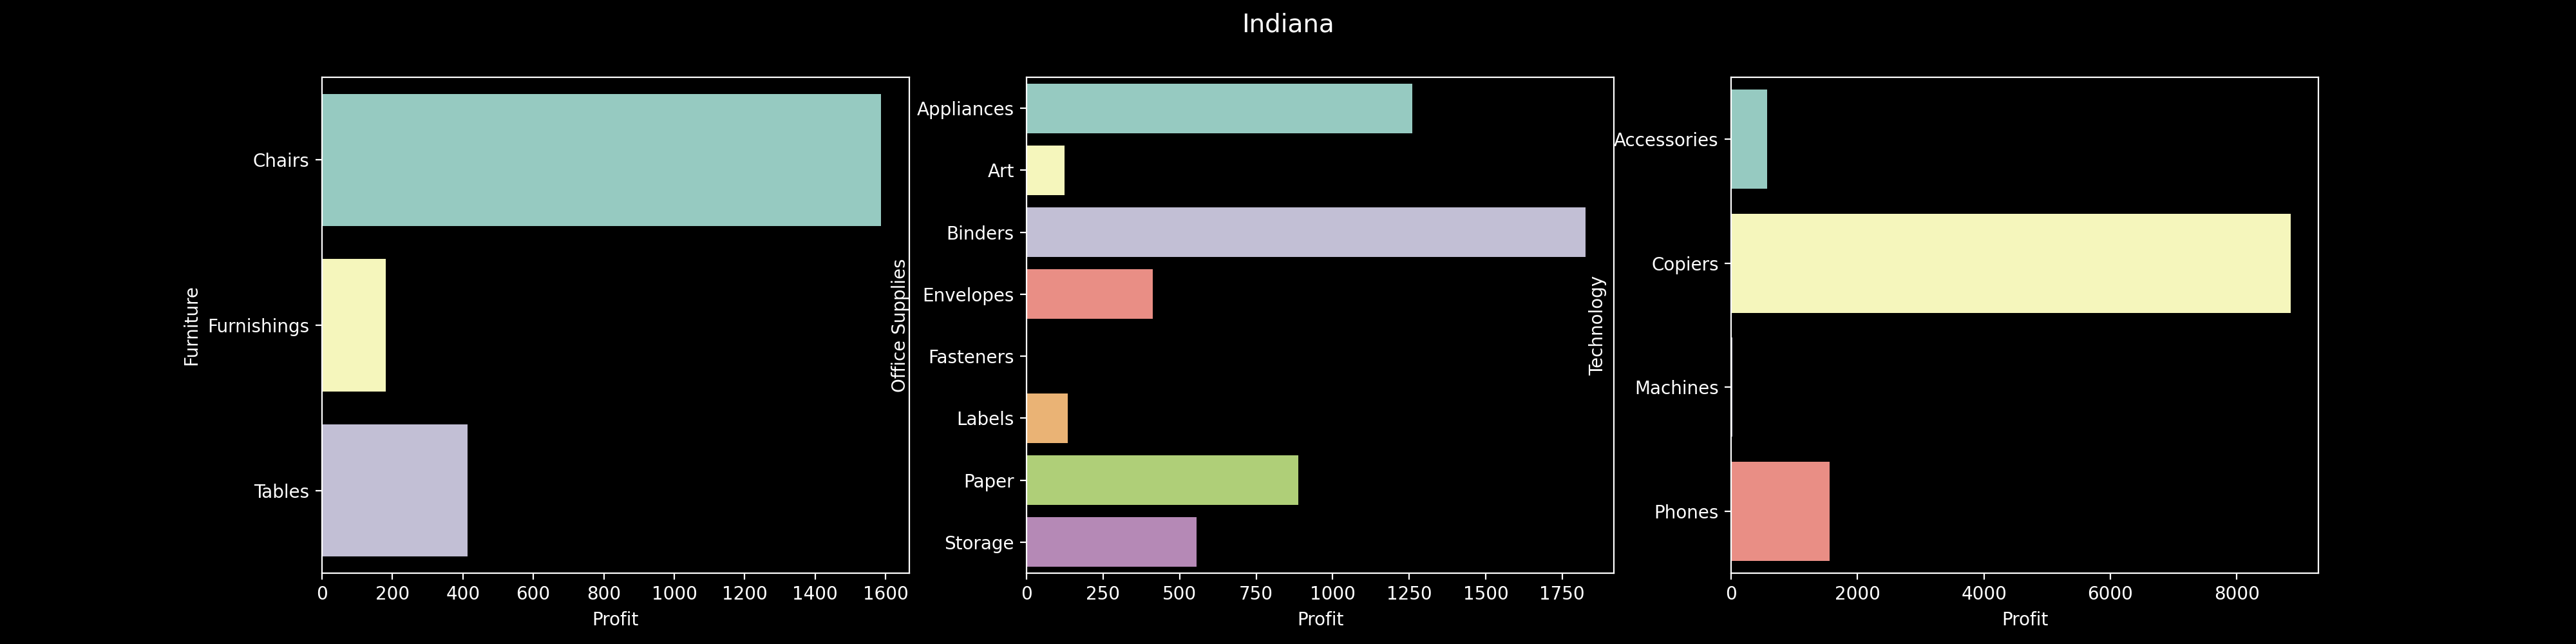

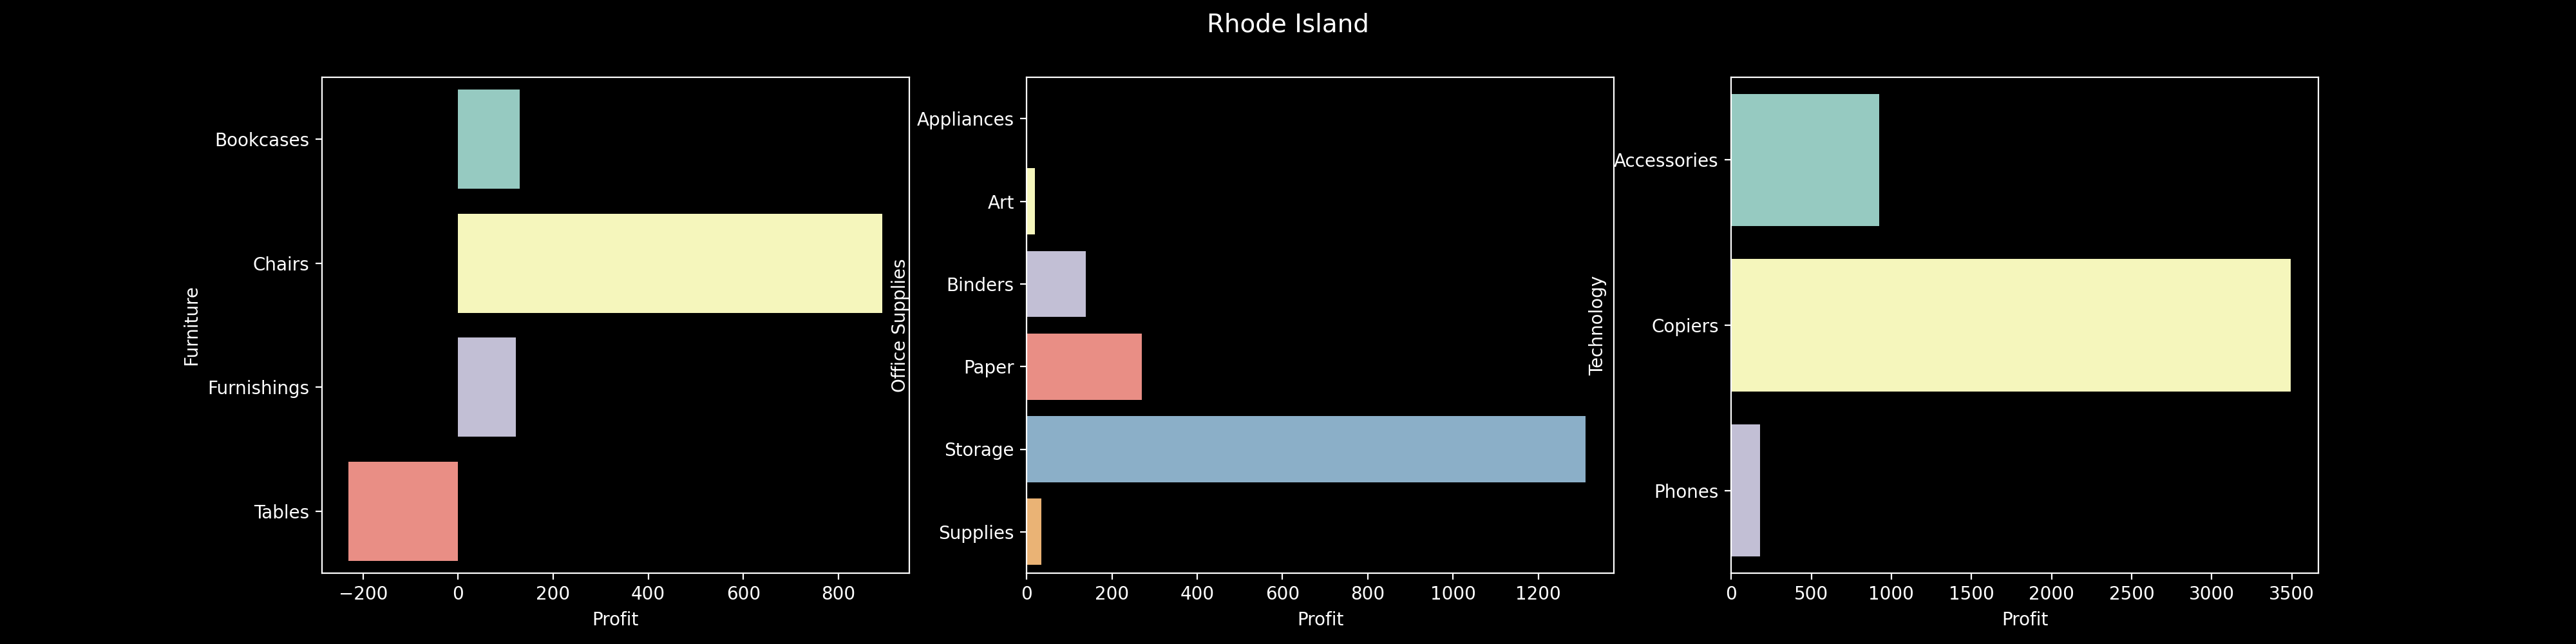

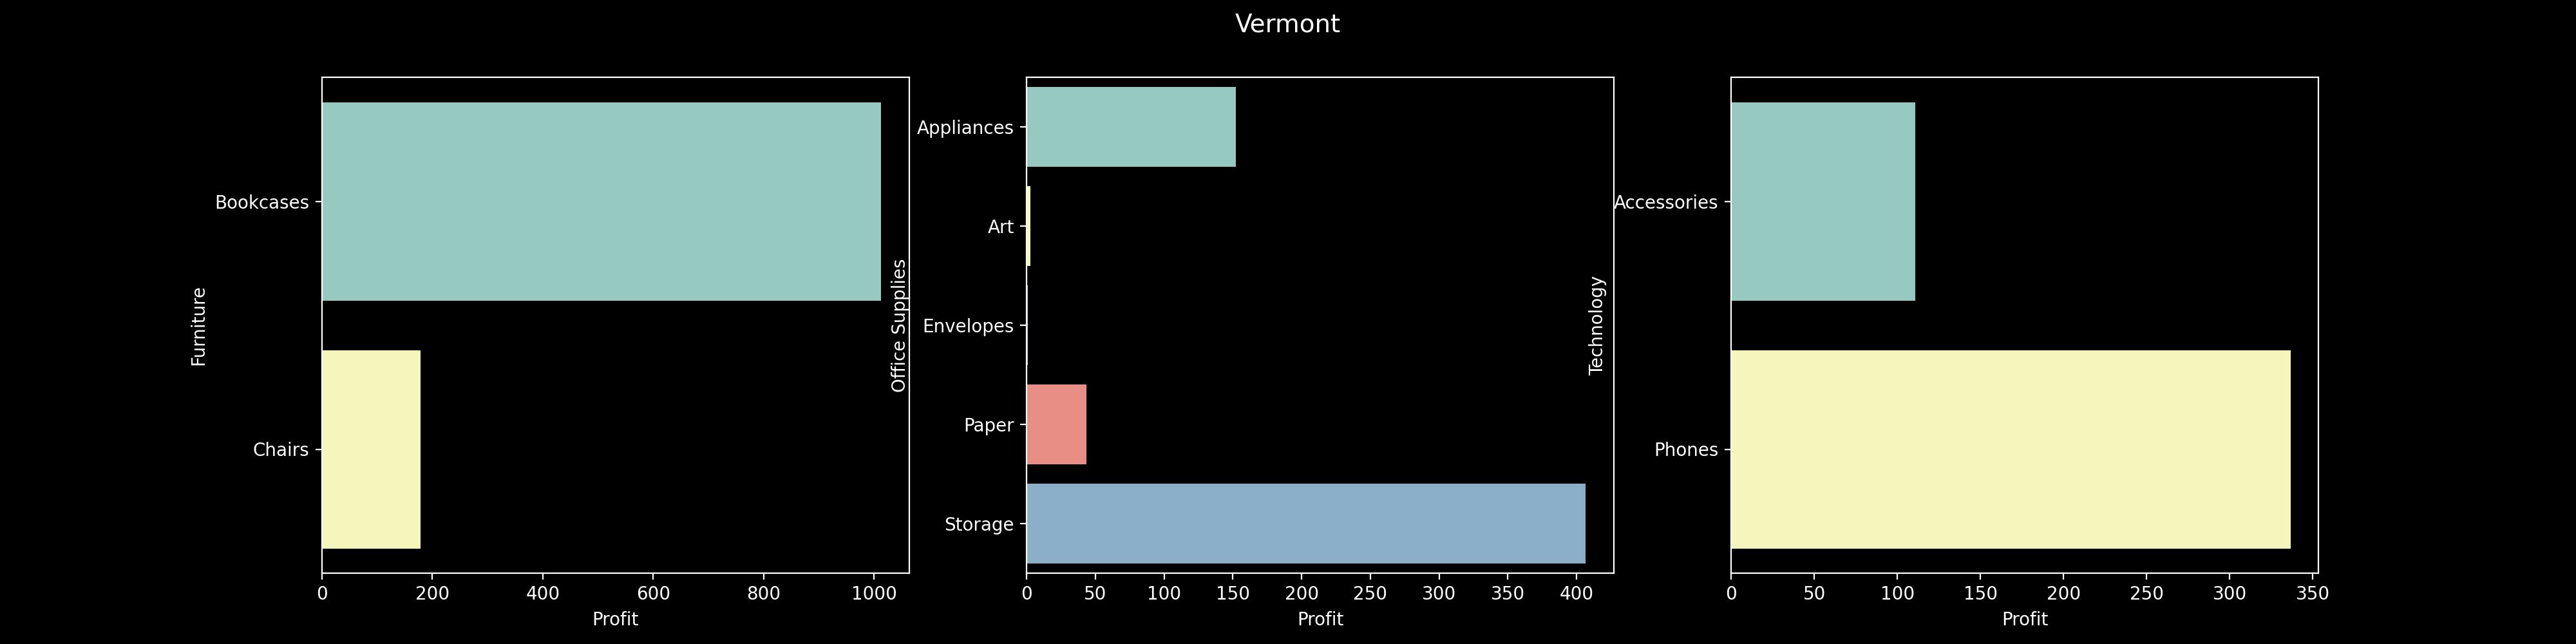

In [22]:
data_arr = ['Ohio','Colorado','North Carolina','Tennessee','Pennsylvania','Texas','Minnesota','Montana','Indiana','Rhode Island','Vermont']
X = ['State']
products(data_arr,X)

*__DISCOUNT ANALYSIS ON SUB-CATEGORIES__*

In [23]:
df_subc= df.groupby(['Sub-Category'])[['Sales', 'Discount', 'Profit']].mean().sort_values('Discount')
df_subc.head()

,Sales,Discount,Profit
Sub-Category,,,
Labels,34.303055,0.068681,15.236962
Storage,264.590553,0.074704,25.152277
Art,34.068834,0.074874,8.200737
Paper,57.284092,0.074891,24.856620
Supplies,245.650200,0.076842,-6.258418


In [24]:
df_subc.tail()

,Sales,Discount,Profit
Sub-Category,,,
Chairs,532.332420,0.170178,43.095894
Bookcases,503.859633,0.211140,-15.230509
Tables,648.794771,0.261285,-55.565771
Machines,1645.553313,0.306087,29.432669
Binders,133.560560,0.372292,19.843574


# OVERALL SUGGESTIONS 

__1) Discount on products incurring huge losses should be decreased.__

__2) From the above analysis, we can observe that some products tend to be profitable in some states while incurring losses in other. Discount should be increased in such states where the product is not profitable.__

__3) Discount should be given such that both customer and the company profits.__